<b> <font size = 5> Statistical Inference and Feature Engineering with All Facilities </b> </font>

This iPython Notebook performs statistical analysis of different datasets used in this analysis. The first section of the notebook focuses on the issue of multicollinearity and different methods are tested to resolve this issue in the dataset. This includes a simple Ordinary Least Square fit to drop highly collinear features, step forward approach with R2 and Variance Inflation Factor estimation, and Lasso regularization. Next, a Random Forest approach is used for feature selection. 

In the second section of this notebook, machine learning models are built to predict air concentration using the input features. Different models are tested with and without a Principal Component Analysis approach including Linear, Ridge and Elastic Net Regression, Random Forest and XGBoost. 

In [17]:
#Import basic python packages for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
import pylab as plot
import matplotlib
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points
import random
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import time

import pickle

### Import Sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet




### Import Scipy stats packages
from scipy.stats import pearsonr
from scipy.stats import boxcox


# Import statsmodel packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


#Sequential Feature Selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



import re


import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'whitegrid')
sns.set_palette('bright')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#  <b> <font size = 5>  Statistical Data Analysis <b> </font>

## <b> <font size = 4>  Load the DataFrames   </b> </font> 

In [3]:
BC_All= pd.read_csv("Data/BC_All_Facilities_input.csv")
NO2_All = pd.read_csv("Data/NO2_All_Facilities_input.csv")

In [4]:
#Drop the first column and rename 'BC Value' and 'NO2 Value'
BC_All.drop(columns = ['Unnamed: 0'], inplace=True)
NO2_All.drop(columns = ['Unnamed: 0'], inplace=True)

BC_All.rename(columns = {'BC Value': 'BC_Value'}, inplace = True)
NO2_All.rename(columns = {'NO2 Value': 'NO2_Value'}, inplace = True)

<b> <font size = 3> Create feature list</b> </font> 

In [5]:
# Create a feature list by dropping BC_value and NO2_value
BC_features = BC_All.drop(columns = ['BC_Value'])
NO2_features = NO2_All.drop(columns = ['NO2_Value'])

X_BC_scaled = pd.DataFrame(StandardScaler().fit_transform(BC_features), index = BC_features.index, columns = BC_features.columns)

BC_df_scaled = pd.concat([BC_All['BC_Value'], X_BC_scaled], axis = 1)


X_NO2_scaled = pd.DataFrame(StandardScaler().fit_transform(NO2_features), index = NO2_features.index, columns = NO2_features.columns)


NO2_df_scaled = pd.concat([NO2_All['NO2_Value'], X_NO2_scaled], axis = 1)


## <b> <font size = 4>  Simple OLS fit on individual features </b> </font> 

### <b> <font size = 3> BC Dataset </b> </font> 

In [29]:
r2_BC = []
for column in BC_features.columns[0:]:
        r2 = sm.OLS(BC_All['BC_Value'], BC_features[column]).fit().rsquared
        r2_BC.append(r2)
BC_r2_score_df = pd.DataFrame({'Feature': BC_features.columns, 'Individual_R2':r2_BC})


In [30]:
BC_r2_score_df.sort_values('Individual_R2', ascending = False)

,Feature,Individual_R2
349,Radiation,0.590165
350,Maxtemp,0.589760
351,Mintemp,0.589044
352,Pressure,0.588588
84,127811-Retail-Res-medium_dist,0.576016
277,18544711-Manufacturing-low_dist,0.575559
158,14318611-FoodPlant-high_dist,0.575417
92,13750711-Retail-Res-high_dist,0.574395
207,17247811-Retail-Res-low_dist,0.572499
131,14122011-Retail-Res-high_dist,0.570582


<div class="alert alert-block alert-success"> <b> The above cells shows that the top few features having the largest correlation with BC concentration are Radiation, max temperature, min temperature, pressure, Retail-Res-medium-127811, Manufacturing-low-18544711.  </b> </div>

### <b> <font size = 4>  NO2 Dataset </b> </font> 

In [31]:
r2_NO2 = []
for column in NO2_features.columns[0:]:
        r2 = sm.OLS(NO2_All['NO2_Value'], NO2_features[column]).fit().rsquared
        r2_NO2.append(r2)
NO2_r2_score_df = pd.DataFrame({'Feature': NO2_features.columns, 'Individual_R2':r2_NO2})


In [32]:
NO2_r2_score_df.sort_values('Individual_R2', ascending = False)

,Feature,Individual_R2
318,Radiation,0.758557
320,Mintemp,0.757694
319,Maxtemp,0.757622
321,Pressure,0.757288
317,Precip,0.734353
30,10490111-Transportation-medium_dist,0.729996
79,13750711-Retail-Res-high_dist,0.729319
51,10505411-Manufacturing-medium_dist,0.727134
141,14318611-FoodPlant-high_dist,0.726710
259,18544711-Manufacturing-low_dist,0.725161


<div class="alert alert-block alert-success"> <b> The above cells shows that the top few features having the largest correlation with BC concentration are Radiation, min temperature, max temperature, pressure, precipitation, Transportation-10490111.  </b> </div>

## <b> <font size = 4> Simple OLS fit on un-correlated features alone </b> </font>

The goal is to identify and drop the features that are highly positively correlated or negatively correlated and fit an OLS on the remaining features

In [33]:
# Next, identify all the features that have a correlation higher than 0.90 or lower than -0.90 indicating a strong positive or negative correlation
threshold_1 = 0.90
threshold_2 = -0.90

def features_high_corr(df_features_corr):
    columns = np.full((df_features_corr.shape[0],), True, dtype=bool)
    for i in range(df_features_corr.shape[0]):
        for j in range(i+1, df_features_corr.shape[0]):
            if (df_features_corr.iloc[i,j] >= threshold_1) | (df_features_corr.iloc[i,j] <= threshold_2) :
                if columns[j]:
                    columns[j] = False
    selected_columns = df_features_corr.columns[columns]
    return selected_columns


### <b> <font size = 3> BC Dataset </b> </font> 

In [34]:
BC_features_corr = BC_features.corr()
BC_features_OLS = features_high_corr(BC_features_corr)
print("Features in BC dataset that are not highly correlated: ")
print(BC_features_OLS)

Features in BC dataset that are not highly correlated: 
Index(['10452611-Manufacturing-low_dist', '10452911-Retail-Res-high_dist',
       '10457011-Manufacturing-medium_dist', 'Precip', 'Radiation', 'Maxtemp',
       'Mintemp', 'Pressure', 'number_intersections'],
      dtype='object')


In [35]:
#Create a dataframe with BC value and selected columns from Lasso
OLS_BC_df = BC_All[['BC_Value']].join(BC_All[['10452611-Manufacturing-low_dist', '10452911-Retail-Res-high_dist',
       '10457011-Manufacturing-medium_dist', 'Precip', 'Radiation', 'Maxtemp',
       'Mintemp', 'Pressure', 'number_intersections']])

In [36]:
## Plot Correlation matrix
OLS_BC_df_corr = OLS_BC_df.corr()
BC_features_corr_mat = OLS_BC_df_corr.as_matrix()


module://ipykernel.pylab.backend_inline


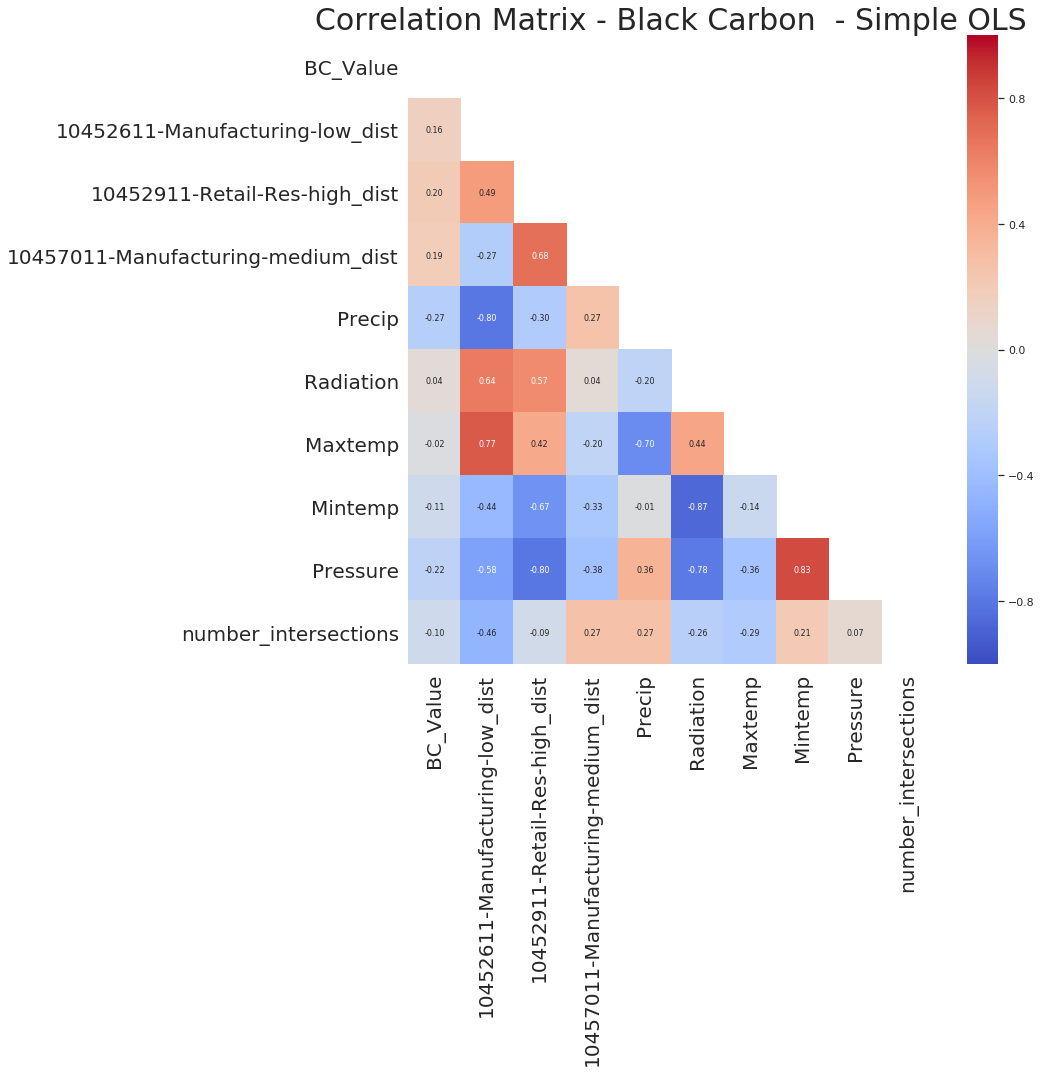

In [37]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
BC_features_corr_mat[np.triu_indices_from(BC_features_corr_mat)] = np.nan

fig, ax = plt.subplots(figsize=(15, 15))

hm = sns.heatmap(BC_features_corr_mat, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(OLS_BC_df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(OLS_BC_df_corr.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(OLS_BC_df_corr.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Black Carbon  - Simple OLS', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

In [38]:
## Fit an OLS on the remaining features
BC_OLS_corr_model = sm.OLS(BC_All['BC_Value'], BC_features[BC_features_OLS])
BC_OLS_corr_results = BC_OLS_corr_model.fit() 
BC_OLS_corr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               BC_Value   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.712
Method:                 Least Squares   F-statistic:                              5893.
Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:20:22   Log-Likelihood:                         -15924.
No. Observations:               21488   AIC:                                  3.187e+04
Df Residuals:                   21479   BIC:                                  3.194e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
10452611-Manufacturing-low_dist        0.1494      0.005     30.191      0.000       0.140       0.159
10452911-Retail-Res-high_dist         -0.3986      0.010    -40.459      0.000      -0.418      -0.379
10457011-Manufacturing-medium_dist     0.2950      0.006     49.908      0.000       0.283       0.307
Precip                                -1.3444      0.079    -16.993      0.000      -1.500      -1.189
Radiation                              0.0692      0.002     30.649      0.000       0.065       0.074
Maxtemp                               -0.9051      0.042    -21.691      0.000      -0.987      -0.823
Mintemp                                0.4854      0.139      3.501      0.000       0.214       0.757
Pressure                              -0.0084      0.002     -4.405      0.000      -0.012      -0.005
number_intersections                  -0.0107      0.001    -15.376      0.000      -0.012      -0.009
==============================================================================
Omnibus:                     5268.254   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17298.516
Skew:                           1.237   Prob(JB):                         0.00
Kurtosis:                       6.634   Cond. No.                     4.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
## R2, Coefficient and Intercept
print("The R2 is {}".format(BC_OLS_corr_results.rsquared), "The R2 tells us that there is a correlation between the features identified and concentration. ")

The R2 is 0.7117513520847643 The R2 tells us that there is a correlation between the features identified and concentration. 


Text(5, 2.5, 'R2 = 0.712')

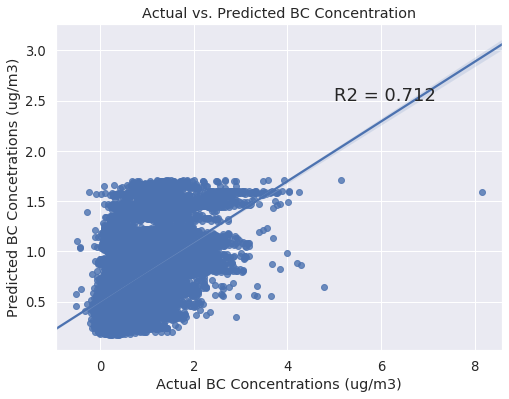

In [40]:
# Creating a plot of BC concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = BC_All.BC_Value, y = BC_OLS_corr_results.fittedvalues, fit_reg=True)
ax.set(xlabel = 'Actual BC Concentrations (ug/m3)', ylabel = 'Predicted BC Concetrations (ug/m3)')
plt.title('Actual vs. Predicted BC Concentration')
plt.text(5 , 2.5 ,"R2 = 0.712", fontsize = 18)


<div class="alert alert-block alert-success"> <b> The above plot shows that the simple linear model does a decent job of predicting concentrations below 2 ug/m3, but does not perform well at high concentrations. Features that had a correlation coefficient below 0.9 or above -0.9, include 10452611-Manufacturing, 10452911-Retail-Res,
       10457011-Manufacturing, Precip, Radiation, Maxtemp,
       Mintemp, Pressure, number_intersections  </b> </div>

### <b> <font size = 4>  NO2 Dataset </b> </font> 

In [41]:
NO2_features_corr = NO2_features.corr()
NO2_features_OLS = features_high_corr(NO2_features_corr)
print("Features in NO2 dataset that are not highly correlated: ")
print(NO2_features_OLS)

Features in NO2 dataset that are not highly correlated: 
Index(['10452911-Retail-Res-high_dist', '10457011-Manufacturing-medium_dist',
       '10457511-Manufacturing-high_dist', '10466511-FoodPlant-high_dist',
       'Precip', 'Radiation', 'Maxtemp', 'Mintemp', 'Pressure',
       'number_intersections'],
      dtype='object')


In [42]:
#Create a dataframe with NO2 value and selected columns from Lasso
OLS_NO2_df = NO2_All[['NO2_Value']].join(NO2_All[['10452911-Retail-Res-high_dist', '10457011-Manufacturing-medium_dist',
       '10457511-Manufacturing-high_dist', '10466511-FoodPlant-high_dist' ,'Precip', 'Radiation', 'Maxtemp',
       'Mintemp', 'Pressure', 'number_intersections']])

In [43]:
## Plot Correlation matrix
OLS_NO2_df_corr = OLS_NO2_df.corr()
NO2_features_corr_mat = OLS_NO2_df_corr.as_matrix()


module://ipykernel.pylab.backend_inline


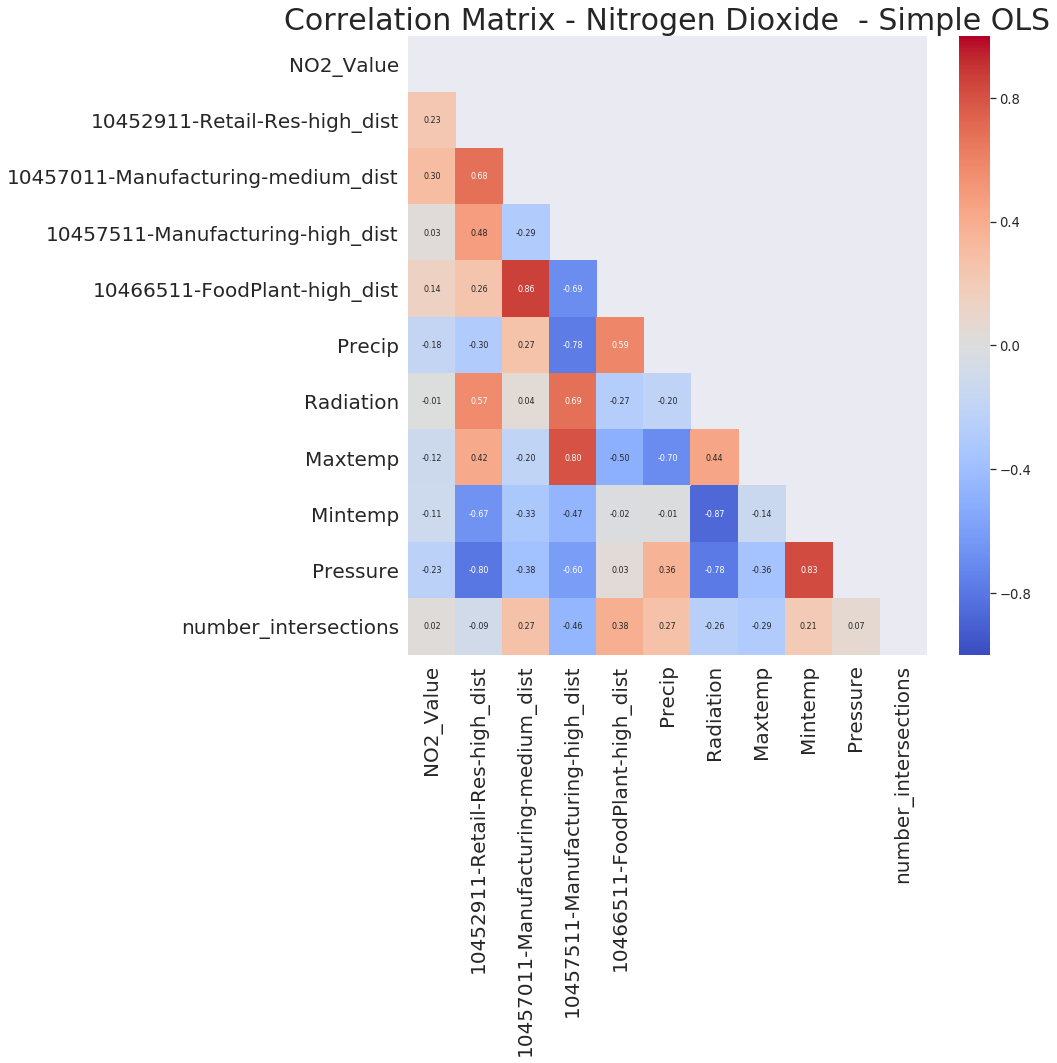

In [44]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
NO2_features_corr_mat[np.triu_indices_from(NO2_features_corr_mat)] = np.nan

fig, ax = plt.subplots(figsize=(15, 15))

hm = sns.heatmap(NO2_features_corr_mat, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(OLS_NO2_df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(OLS_NO2_df_corr.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(OLS_NO2_df_corr.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Nitrogen Dioxide  - Simple OLS', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

In [45]:
## Fit an OLS on the remaining features
NO2_OLS_corr_model = sm.OLS(NO2_All['NO2_Value'], NO2_features[NO2_features_OLS])
NO2_OLS_corr_results = NO2_OLS_corr_model.fit() 
NO2_OLS_corr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                          1.384e+04
Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:20:30   Log-Likelihood:                         -73015.
No. Observations:               21488   AIC:                                  1.461e+05
Df Residuals:                   21478   BIC:                                  1.461e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
10452911-Retail-Res-high_dist         -9.4084      0.144    -65.234      0.000      -9.691      -9.126
10457011-Manufacturing-medium_dist    10.8755      0.126     86.457      0.000      10.629      11.122
10457511-Manufacturing-high_dist       2.2774      0.095     23.884      0.000       2.091       2.464
10466511-FoodPlant-high_dist          -4.6254      0.075    -61.579      0.000      -4.773      -4.478
Precip                               -11.9176      1.173    -10.160      0.000     -14.217      -9.619
Radiation                              0.6287      0.034     18.509      0.000       0.562       0.695
Maxtemp                              -14.6234      0.748    -19.561      0.000     -16.089     -13.158
Mintemp                                1.7198      2.252      0.764      0.445      -2.694       6.134
Pressure                               0.1329      0.026      5.088      0.000       0.082       0.184
number_intersections                  -0.0788      0.010     -7.855      0.000      -0.098      -0.059
==============================================================================
Omnibus:                     2739.437   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4497.707
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                       4.382   Cond. No.                     4.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
## R2, Coefficient and Intercept
print("The R2 is {}".format(NO2_OLS_corr_results.rsquared), "The R2 tells us that there is a correlation between the features identified and concentration. ")

The R2 is 0.8656264875177946 The R2 tells us that there is a correlation between the features identified and concentration. 


Text(46, 29, 'R2 = 0.866')

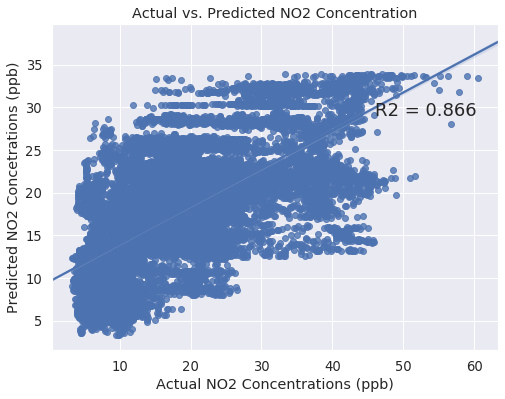

In [47]:
# Creating a plot of NO2 concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = NO2_All.NO2_Value, y = NO2_OLS_corr_results.fittedvalues, fit_reg=True)
ax.set(xlabel = 'Actual NO2 Concentrations (ppb)', ylabel = 'Predicted NO2 Concetrations (ppb)')
plt.title('Actual vs. Predicted NO2 Concentration')
plt.text(46 , 29 ,"R2 = 0.866", fontsize = 18)


<div class="alert alert-block alert-success"> <b>Once again, the above plot shows that the simple linear model does a decent job of predicting concentrations below 30 ppb, but does not perform well at high concentrations. Features that had a correlation coefficient below 0.9 or above -0.9 include 10452911-Retail-Res, 10457011-Manufacturing,10457511-Manufacturing, 10466511-FoodPlant ,Precip, Radiation, Maxtemp, Mintemp, Pressure, number_intersections</b></div>

##  <b> <font size = 4>  Performing a box-cox transformation </b> </font>

In [48]:
# First make a copy of each dataframe and apply transformation on copy
BC_df_transform = BC_All.copy()
NO2_df_transform = NO2_All.copy()

In [49]:
lambdas_BC = pd.DataFrame(columns = ['Column_name', "Lambda"])
lambdas_NO2 = pd.DataFrame(columns = ['Column_name', "Lambda"])
def boxcox_transform(df):
    lambdas_df = pd.DataFrame(columns = ['Column_name', "Lambda"])
    for column in df.columns:
        if df[column].min() <=0 :
            df[column] = df[column] - df[column].min() + 0.01
        df[column], boxcox_lambda = boxcox(df[column])
        lambdas_df = lambdas_df.append({'Column_name': column, 'Lambda':boxcox_lambda}, ignore_index = True)
    return lambdas_df

<b> <font size = 3>  Store transformed data and corresponding Lambdas in a dataframe </b> </font> 

In [50]:
lambdas_BC = boxcox_transform(BC_df_transform)
lambbas_NO2 = boxcox_transform(NO2_df_transform)

<b> <font size = 3>  Recreate the dataframes with normalized X and Y, and standardize the data </b> </font> 

In [51]:
#BC Dataset
y_BC_transformed = BC_df_transform[['BC_Value']]
X_BC_transformed = BC_df_transform.drop(columns = ['BC_Value'])
X_BC_transformed_scaled = pd.DataFrame(StandardScaler().fit_transform(X_BC_transformed), index = X_BC_transformed.index, columns = X_BC_transformed.columns)
BC_df_transformed_scaled = y_BC_transformed.join(X_BC_transformed_scaled)

In [52]:
#NO2 Dataset
y_NO2_transformed = NO2_df_transform[['NO2_Value']]
X_NO2_transformed = NO2_df_transform.drop(columns = ['NO2_Value'])
X_NO2_transformed_scaled = pd.DataFrame(StandardScaler().fit_transform(X_NO2_transformed), index = X_NO2_transformed.index, columns = X_NO2_transformed.columns)
NO2_df_transformed_scaled = y_NO2_transformed.join(X_NO2_transformed_scaled)

##  <b> <font size = 4> Function to create inputs to R2-VIF function for BC </b> </font> 

In [53]:
def create_inputs_R2_vif_func_BC(X, y):
    #Calculate R2_VIF scores for training set and identify features
    input_df = pd.concat([y, X], axis = 1)
    #Update column name for X_train_BC to be of format Q('Column Name')
    output_featurelist_BC = []

    for feature_name in X.columns:
        output_featurelist_BC.append("Q('" + feature_name + "')")
    output_features_BC = ' + '.join(output_featurelist_BC)

    #  get y and X dataframes based on this regression:
    y_df, X_df = dmatrices('BC_Value ~' + output_features_BC, input_df, return_type='dataframe')
    X_df.drop(X_df.columns[0], axis = 1, inplace = True)
    return X_df, input_df


##  <b> <font size = 4> Function to create inputs to R2_VIF function for NO2 </b> </font> 

In [54]:
def create_inputs_R2_vif_func_NO2(X, y):
    #Calculate R2_VIF scores for training set and identify features
    input_df = pd.concat([y, X], axis = 1)
    #Update column name for X_train_NO2 to be of format Q('Column Name')
    output_featurelist_NO2 = []

    for feature_name in X.columns:
        output_featurelist_NO2.append("Q('" + feature_name + "')")
    output_features_NO2 = ' + '.join(output_featurelist_NO2)

    #  get y and X dataframes based on this regression:
    y_df, X_df = dmatrices('NO2_Value ~' + output_features_NO2, input_df, return_type='dataframe')
    X_df.drop(X_df.columns[0], axis = 1, inplace = True)
    return X_df, input_df


## <b> <font size = 4> R2_VIF: Function to identify set of features with max R2 and low VIF scores</b> </font> </span> 

In [55]:
## In this function, you pass the features, feature_df in the format Q(' ') and the entire dataframe with scaled values
## Input parameters are as follows
## feature_df = dataframe of all features i.e. X variables
## target_str = 'string' either 'BC_Value' or 'NO2_Value'
## df = dataframe of X and y

def calculate_R2_vif(feature_df, target_str, df):
    vif_score = []
    vif_df = pd.DataFrame()

    thresh = 10
    output = pd.DataFrame()
    output_featurelist = []
    max_R2 = 0
    k = feature_df.shape[1]
    first_feature = None
    for column in df.columns[1:]:
        r2 = sm.OLS(df[target_str], df[column]).fit().rsquared
        if r2 > max_R2:
            max_R2 = r2
            first_feature = column
    output_featurelist.append("Q('" + first_feature + "')")
    print(output_featurelist)
    
    for i in range(1,k):
        if (df.columns[i] == first_feature):
            continue
        
        output_featurelist.append(feature_df.columns[i]) # Start with the first column we identified before, and append the next column with every iteration
        
        output_features = ' + '.join(output_featurelist)
        y, X = dmatrices(target_str + '~' + output_features, df, return_type='dataframe') #Create matrix each time a column is appended

       
        #Set should drop feature as False initially
        shouldDropFeature = False

        #Check if R2 for the new model is greater than the max_R2

        if (sm.OLS(y,X).fit().rsquared) > max_R2:
            max_R2 = sm.OLS(y,X).fit().rsquared
            # For each X, calculate VIF and save in dataframe
            vif = [variance_inflation_factor(X.values, j) for j in range(X.shape[1])] #Calculate VIF score for each model
            if np.amax(vif) > thresh:    
                shouldDropFeature = True
        else:
            shouldDropFeature = True

        #print(output_featurelist)
        if shouldDropFeature:
            # Drop latest feature if VIF is > 10 OR r^2 < max r^2 for any feature after adding latest feature
            output_featurelist = output_featurelist[:-1]
            #print(output_featurelist)
            
    # Create final feature list    
    final_output_featurelist = output_featurelist
    final_output_features = ' + '.join(final_output_featurelist)

    
    #Recalculate X and Y for final feature list
    y, X = dmatrices(target_str +  '~' + final_output_features, df, return_type='dataframe')
    #Estimate VIF score for final feature list
    vif_df["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
    
    vif_df["features"] = X.columns
    X.drop(columns = ['Intercept'], inplace=True)

    #Fit an OLS model for the final features that are selected and return summary statistics, VIF scores (This has to happen prior to VIF check)
    vif_ols_model = sm.OLS(y, X)
    vif_ols_results = vif_ols_model.fit()
    return vif_df, vif_ols_results.summary()

        

##  <b> <font size = 4> Lasso Regularization with Gridsearch </b> </font>

In [5]:
# First define a function to calculate scores for a model

def get_cv_scores(model, X_train, y_train):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    return('CV Mean: ', np.mean(scores), 'STD: ', np.std(scores))


### <b> <font size = 3>  BC dataset
</b> </font> 

In [6]:
# First set up the test-train split
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_BC_transformed_scaled, y_BC_transformed, test_size=0.30, random_state=0)

NameError: name 'X_BC_transformed_scaled' is not defined

In [61]:
# Train model with default alpha=1
lasso_BC = Lasso(alpha=1).fit(X_train_BC, y_train_BC)

# get cross val scores
get_cv_scores(lasso_BC, X_train_BC, y_train_BC)

('CV Mean: ', -0.0006961926159118059, 'STD: ', 0.0011057797886150414)

In [62]:
##Instantiate a Lasso Regularization model. Performe a LassoCV using 5-fold cross validation
lassoCV_BC = LassoCV(cv=5, alphas= None)

#Fit the model to BC X and y
lassoCV_BC.fit(X_train_BC, y_train_BC)

### Set the parameters
lasso_BC.set_params(alpha=lassoCV_BC.alpha_)

#Print the optimal valu for alpha that gives the best fit for training data
print("Best Alpha using LassoCV = ", lassoCV_BC.alpha_)


#Using this value of alpha to refit the model
lasso_BC.fit(X_train_BC, y_train_BC)


## Computing mean squared error on the test data
print("MSE on test data = ", mean_squared_error(y_test_BC, lasso_BC.predict(X_test_BC)))

## Best score using Lasso CV 
print("Best score using LassoCV: ", lasso_BC.score(X_test_BC, y_test_BC))

#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_BC = pd.Series(lasso_BC.coef_, index = BC_features.columns)


Best Alpha using LassoCV =  0.00015531175113795207
MSE on test data =  0.07005938189036442
Best score using LassoCV:  0.5819077053856463


In [63]:
#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_BC = pd.Series(lasso_BC.coef_, index = X_BC_transformed.columns)

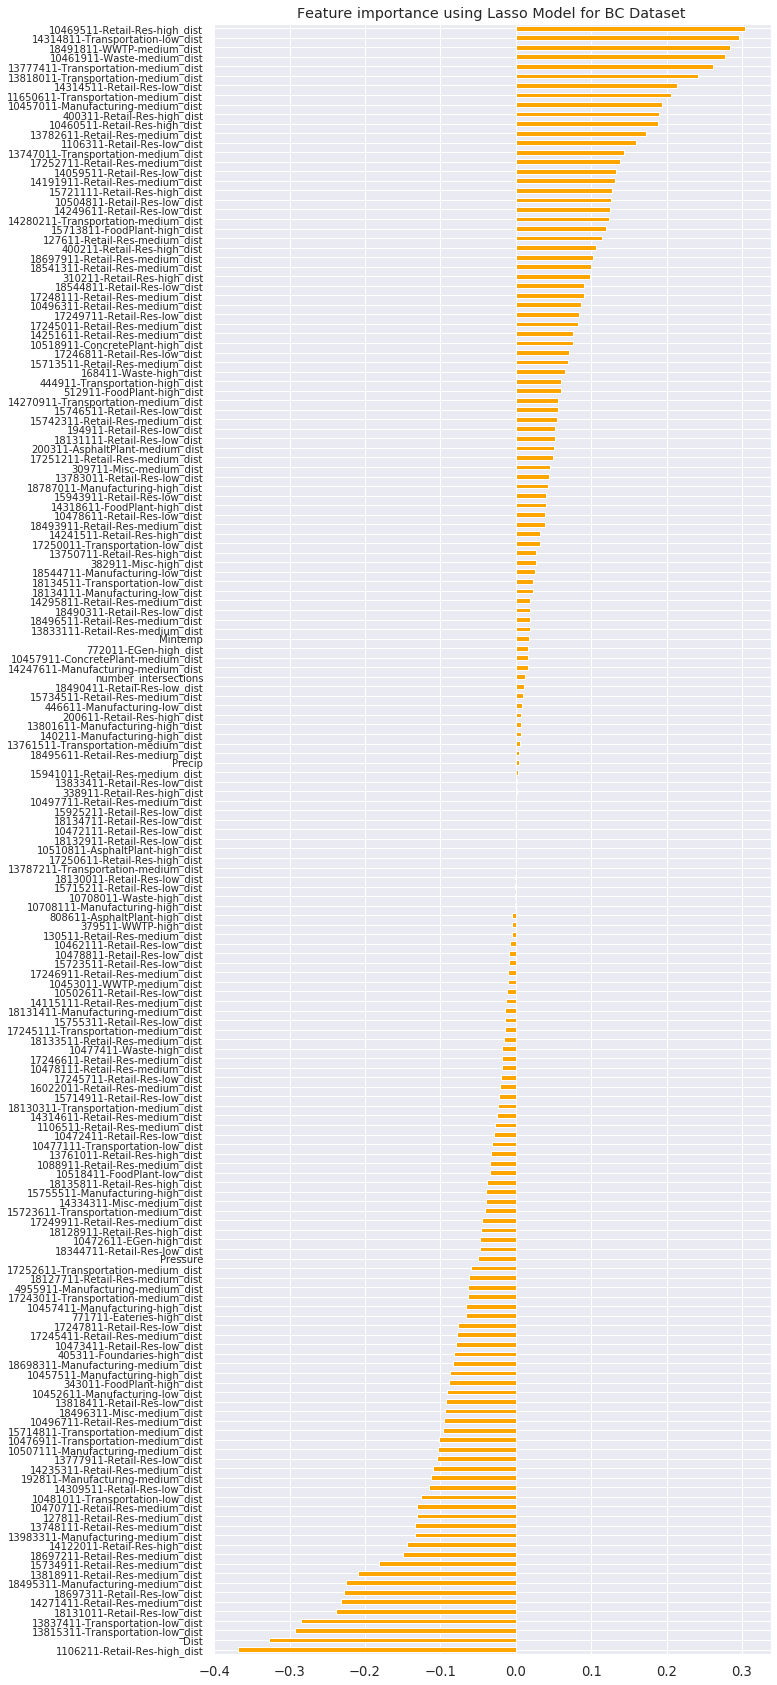

In [72]:
#Display feature importance using Lasso model

#Sort the features
imp_coef = coef_BC[coef_BC !=0].sort_values()

# Plot feature importance in  bar graph
plt.figure(figsize = (10,30))
imp_coef.plot(kind = "barh", color='orange')
plt.title("Feature importance using Lasso Model for BC Dataset")
plt.yticks(fontsize=10)
plt.show()

#### <b> <font size = 3> Calculate VIF scores for the features that were selected by Lasso </b> </font> 

In [73]:
coef_BC[coef_BC !=0].index

Index(['10452611-Manufacturing-low_dist', '10453011-WWTP-medium_dist',
       '10457011-Manufacturing-medium_dist',
       '10457411-Manufacturing-high_dist', '10457511-Manufacturing-high_dist',
       '10457911-ConcretePlant-medium_dist', '10460511-Retail-Res-high_dist',
       '10461911-Waste-medium_dist', '10462111-Retail-Res-low_dist',
       '10469511-Retail-Res-high_dist',
       ...
       '4955911-Manufacturing-medium_dist', '512911-FoodPlant-high_dist',
       '771711-Eateries-high_dist', '772011-EGen-high_dist',
       '808611-AsphaltPlant-high_dist', 'Precip', 'Mintemp', 'Pressure',
       'Dist', 'number_intersections'],
      dtype='object', length=171)

In [74]:
output_featurelist = []
i=0
for feature_name in coef_BC.index:
    score = coef_BC[i]
    if score!=0:
        output_featurelist.append("Q('" + feature_name + "')")
    i += 1
output_features_BC_Lasso = ' + '.join(output_featurelist)

In [75]:
vif_BC_score_Lasso = []
#  get y and X dataframes based on this regression:
y_BC_vif_lasso, X_BC_vif_lasso = dmatrices('BC_Value ~' + output_features_BC_Lasso, BC_df_transformed_scaled, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif_BC_Lasso = pd.DataFrame()
vif_BC_Lasso["VIF Factor"] = [variance_inflation_factor(X_BC_vif_lasso.values, i) for i in range(X_BC_vif_lasso.shape[1])]
vif_BC_Lasso["features"] = X_BC_vif_lasso.columns
vif_BC_score_Lasso.append(vif_BC_Lasso.round(1))


In [76]:
vif_BC_score_Lasso

[       VIF Factor                                  features
 0    1.000000e+00                                 Intercept
 1    1.291200e+03      Q('10452611-Manufacturing-low_dist')
 2    5.148320e+04            Q('10453011-WWTP-medium_dist')
 3    4.631800e+03   Q('10457011-Manufacturing-medium_dist')
 4    1.508744e+13     Q('10457411-Manufacturing-high_dist')
 5    1.943800e+04     Q('10457511-Manufacturing-high_dist')
 6    7.096800e+03   Q('10457911-ConcretePlant-medium_dist')
 7    1.716484e+09        Q('10460511-Retail-Res-high_dist')
 8    2.163440e+04           Q('10461911-Waste-medium_dist')
 9    1.708945e+10         Q('10462111-Retail-Res-low_dist')
 10   7.465000e+02        Q('10469511-Retail-Res-high_dist')
 11   2.684330e+04      Q('10470711-Retail-Res-medium_dist')
 12   2.738748e+05         Q('10472111-Retail-Res-low_dist')
 13   2.526400e+03         Q('10472411-Retail-Res-low_dist')
 14   3.059700e+03              Q('10472611-EGen-high_dist')
 15   4.384100e+03      

####  <b> <font size = 3> Apply the R2_VIF function to training and test data based on features selected by Lasso </b> </font> 

In [77]:
cols_in_BC_lasso = list(coef_BC[coef_BC !=0].index)

In [78]:
#Drop the intercept column from X_BC_vif_lasso
X_BC_vif_lasso.drop(columns = ['Intercept'], inplace = True)

In [81]:
# Create a dataframe with the feature subset
BC_lasso_subset_vif  = pd.concat([BC_All['BC_Value'], BC_All[cols_in_BC_lasso]], axis = 1)

In [82]:
# Split dataframe into test and train data for R2/vif estimation
X_train_lasso_BC_vif, X_test_lasso_BC_vif, y_train_lasso_BC_vif, y_test_lasso_BC_vif = train_test_split(BC_lasso_subset_vif[cols_in_BC_lasso], BC_lasso_subset_vif['BC_Value'], test_size  = 0.30, random_state=0)

**Training data**


In [83]:
X_BC_vif_lasso_train, train_df = create_inputs_R2_vif_func_BC(X_train_lasso_BC_vif, y_train_lasso_BC_vif)

In [84]:
#R2 and VIF scores for Training data
calculate_R2_vif(X_BC_vif_lasso_train, 'BC_Value', train_df)

["Q('Mintemp')"]


(     VIF Factor      features
 0  13263.146002     Intercept
 1      1.000000  Q('Mintemp'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:               BC_Value   R-squared (uncentered):                   0.592
 Model:                            OLS   Adj. R-squared (uncentered):              0.592
 Method:                 Least Squares   F-statistic:                          2.180e+04
 Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        12:09:46   Log-Likelihood:                         -13675.
 No. Observations:               15041   AIC:                                  2.735e+04
 Df Residuals:                   15040   BIC:                                  2.736e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                  

**Test data**


In [85]:
X_BC_vif_lasso_test, test_df = create_inputs_R2_vif_func_BC(X_test_lasso_BC_vif, y_test_lasso_BC_vif)

In [86]:
#R2 and VIF scores for Training data
calculate_R2_vif(X_BC_vif_lasso_test, 'BC_Value', test_df)

["Q('Mintemp')"]


(     VIF Factor      features
 0  13191.377213     Intercept
 1      1.000000  Q('Mintemp'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:               BC_Value   R-squared (uncentered):                   0.583
 Model:                            OLS   Adj. R-squared (uncentered):              0.583
 Method:                 Least Squares   F-statistic:                              9017.
 Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        12:09:54   Log-Likelihood:                         -6054.4
 No. Observations:                6447   AIC:                                  1.211e+04
 Df Residuals:                    6446   BIC:                                  1.212e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                  

<div class="alert alert-block alert-success"> <b> Based on Lasso regularization and feature selection using stepfoward VIF approach and R2 estimation, minimum temperature seems to be the feature having the highest impact of BC concentration </b> </div>

#### <b> <font size = 3> Fit an OLS on all the features that were selected from Lasso </b> </font>

In [87]:
## Fit an OLS on the remaining features
BC_OLS_Lasso = sm.OLS(BC_All['BC_Value'], BC_All[coef_BC[coef_BC !=0].index])
BC_OLS_Lasso_results = BC_OLS_Lasso.fit() 
BC_OLS_Lasso_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               BC_Value   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              765.1
Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
Time:                        12:10:05   Log-Likelihood:                         -8173.4
No. Observations:               21488   AIC:                                  1.669e+04
Df Residuals:                   21317   BIC:                                  1.805e+04
Df Model:                         171                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
10452611-Manufacturing-low_dist         0.2869      0.483      0.594      0.552      -0.660       1.233
10453011-WWTP-medium_dist               8.1068      5.044      1.607      0.108      -1.780      17.993
10457011-Manufacturing-medium_dist      0.8692      0.265      3.282      0.001       0.350       1.388
10457411-Manufacturing-high_dist     2090.3900   4214.881      0.496      0.620   -6171.093    1.04e+04
10457511-Manufacturing-high_dist       12.3609      2.083      5.934      0.000       8.278      16.444
10457911-ConcretePlant-medium_dist    -11.2953      3.635     -3.108      0.002     -18.420      -4.171
10460511-Retail-Res-high_dist         896.4750    271.646      3.300      0.001     364.027    1428.923
10461911-Waste-medium_dist             -0.1332      0.616     -0.216      0.829      -1.340       1.074
10462111-Retail-Res-low_dist         1510.0920    367.764      4.106      0.000     789.247    2230.937
10469511-Retail-Res-high_dist           0.0614      0.265      0.232      0.817      -0.458       0.580
10470711-Retail-Res-medium_dist        -2.6404      3.141     -0.841      0.401      -8.797       3.516
10472111-Retail-Res-low_dist           22.6409      4.928      4.594      0.000      12.982      32.300
10472411-Retail-Res-low_dist           -0.5407      0.752     -0.719      0.472      -2.015       0.933
10472611-EGen-high_dist                 2.2312      0.999      2.234      0.026       0.273       4.189
10473411-Retail-Res-low_dist            0.1521      0.066      2.303      0.021       0.023       0.282
10476911-Transportation-medium_dist    20.1861      1.600     12.617      0.000      17.050      23.322
10477111-Transportation-low_dist        2.8894      1.159      2.493      0.013       0.618       5.161
10477411-Waste-high_dist                2.1998      0.254      8.659      0.000       1.702       2.698
10478111-Retail-Res-medium_dist     -1114.0427    798.888     -1.394      0.163   -2679.923     451.838
10478611-Retail-Res-low_dist            0.0814      3.491      0.023      0.981      -6.762       6.925
10478811-Retail-Res-low_dist          545.6098    166.879      3.269      0.001     218.515     872.705
10481011-Transportation-low_dist      -10.7445      1.098     -9.784      0.000     -12.897      -8.592
10496311-Retail-Res-medium_dist      2198.1395    979.285      2.245      0.025     278.668    4117.611
10496711-Retail-Res-medium_dist         2.3444      0.889      2.638      0.008       0.603       4.086
10497711-Retail-Res-medium_dist         2.6203      0.595      4.401      0.000       1.453       3.787
10502611-Retail-Res-low_dist           -3.6408      0.947     -3.845    

Text(5, 5, 'R2 = 0.860')

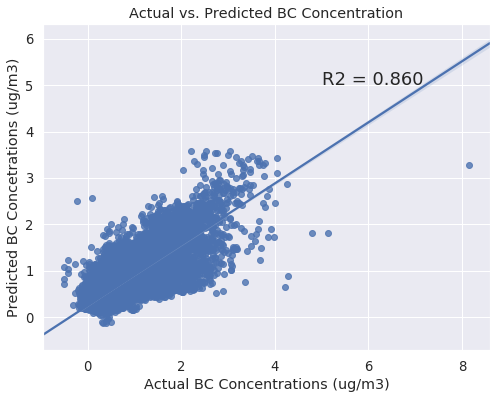

In [89]:
# Creating a plot of BC concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = BC_All.BC_Value, y = BC_OLS_Lasso_results.fittedvalues, fit_reg=True)
ax.set(xlabel = 'Actual BC Concentrations (ug/m3)', ylabel = 'Predicted BC Concetrations (ug/m3)')
plt.title('Actual vs. Predicted BC Concentration')
plt.text(5 , 5 ,"R2 = 0.860", fontsize = 18)


<div class="alert alert-block alert-success"> <b> This model does much better than the model that was developed just based on features that were not highly correlated. Predicted values for high concentration measurements are still pretty poor. The features selected by the Lasso model also have very high VIF scores.</b></div>

### <b> <font size = 3>  NO2 dataset
</b> </font>

In [58]:
# First set up the test-train split
X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = train_test_split(X_NO2_transformed_scaled, y_NO2_transformed, test_size=0.30, random_state=0)

In [59]:
# Train model with default alpha=1
lasso_NO2 = Lasso(alpha=1).fit(X_train_NO2, y_train_NO2)

# get cross val scores
get_cv_scores(lasso_NO2, X_train_NO2, y_train_NO2)

('CV Mean: ', -0.0005128911866175035, 'STD: ', 0.0006258654727031758)

In [92]:
##Instantiate a Lasso Regularization model. Performe a LassoCV using 5-fold cross validation
lassoCV_NO2 = LassoCV(cv=5, alphas= None)

#Fit the model to BC X and y
lassoCV_NO2.fit(X_train_NO2, y_train_NO2)

### Set the parameters
lasso_NO2.set_params(alpha=lassoCV_NO2.alpha_)

#Print the optimal valu for alpha that gives the best fit for training data
print("Best Alpha using LassoCV = ", lassoCV_NO2.alpha_)


#Using this value of alpha to refit the model
lasso_NO2.fit(X_train_NO2, y_train_NO2)


## Computing mean squared error on the test data
print("MSE on test data = ", mean_squared_error(y_test_NO2, lasso_NO2.predict(X_test_NO2)))

## Best score using Lasso CV 
print("Best score using LassoCV: ", lasso_NO2.score(X_test_NO2, y_test_NO2))

#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_NO2 = pd.Series(lasso_NO2.coef_, index = NO2_features.columns)


Best Alpha using LassoCV =  0.00041010339736882186
MSE on test data =  0.1716660930783114
Best score using LassoCV:  0.7033988784171415


In [93]:
#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_NO2 = pd.Series(lasso_NO2.coef_, index = X_NO2_transformed.columns)
coef_NO2

10452911-Retail-Res-high_dist         -0.000000
10453011-WWTP-medium_dist             -0.000636
10457011-Manufacturing-medium_dist     0.610643
10457511-Manufacturing-high_dist      -0.462947
10460411-Retail-Res-medium_dist       -0.043152
10460511-Retail-Res-high_dist          0.047153
10461011-Retail-Res-low_dist           0.000000
10461711-Retail-Res-medium_dist        0.000000
10461911-Waste-low_dist                0.598345
10462111-Retail-Res-low_dist          -0.000000
10466511-FoodPlant-high_dist           0.000000
10469511-Retail-Res-medium_dist        0.750513
10470711-Retail-Res-medium_dist       -0.159326
10471211-Retail-Res-low_dist           0.005425
10472111-Retail-Res-low_dist           0.046907
10472311-Retail-Res-medium_dist        0.000464
10472411-Retail-Res-medium_dist        0.000000
10472611-EGen-medium_dist              0.000000
10473411-Retail-Res-low_dist          -0.319624
10473611-Manufacturing-medium_dist    -0.000000
10476211-Retail-Res-low_dist           0

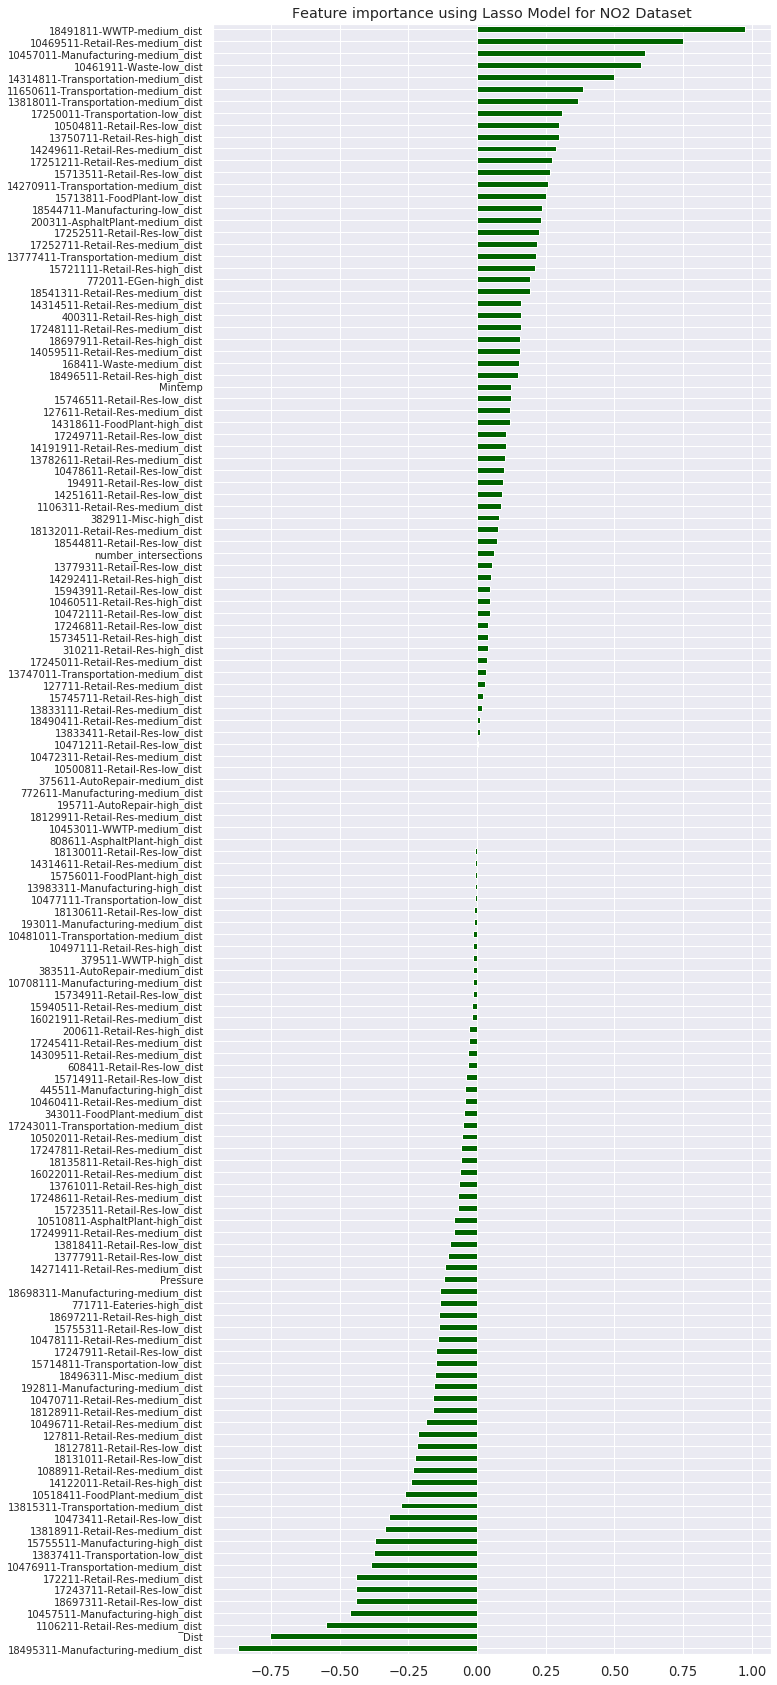

In [95]:
#Display feature importance using Lasso model

#Sort the features
imp_coef = coef_NO2[coef_NO2 !=0].sort_values()

# Plot feature importance in  bar graph
plt.figure(figsize = (10,30))
imp_coef.plot(kind = "barh", color='darkgreen')
plt.title("Feature importance using Lasso Model for NO2 Dataset")
plt.yticks(fontsize=10)
plt.show()

#### <b> <font size = 3> Calculate VIF scores for the features selected by Lasso </b> </font>

In [96]:
coef_NO2[coef_NO2 !=0].index

Index(['10453011-WWTP-medium_dist', '10457011-Manufacturing-medium_dist',
       '10457511-Manufacturing-high_dist', '10460411-Retail-Res-medium_dist',
       '10460511-Retail-Res-high_dist', '10461911-Waste-low_dist',
       '10469511-Retail-Res-medium_dist', '10470711-Retail-Res-medium_dist',
       '10471211-Retail-Res-low_dist', '10472111-Retail-Res-low_dist',
       ...
       '445511-Manufacturing-high_dist', '608411-Retail-Res-low_dist',
       '771711-Eateries-high_dist', '772011-EGen-high_dist',
       '772611-Manufacturing-medium_dist', '808611-AsphaltPlant-high_dist',
       'Mintemp', 'Pressure', 'Dist', 'number_intersections'],
      dtype='object', length=137)

In [97]:
output_featurelist = []
i=0
for feature_name in coef_NO2.index:
    score = coef_NO2[i]
    if score!=0:
        output_featurelist.append("Q('" + feature_name + "')")
    i += 1
output_features_NO2_Lasso = ' + '.join(output_featurelist)

In [98]:
vif_NO2_score_Lasso = []
#  get y and X dataframes based on this regression:
y_NO2_vif_lasso, X_NO2_vif_lasso = dmatrices('NO2_Value ~' + output_features_NO2_Lasso, NO2_df_transformed_scaled, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif_NO2_Lasso = pd.DataFrame()
vif_NO2_Lasso["VIF Factor"] = [variance_inflation_factor(X_NO2_vif_lasso.values, i) for i in range(X_NO2_vif_lasso.shape[1])]
vif_NO2_Lasso["features"] = X_NO2_vif_lasso.columns
vif_NO2_score_Lasso.append(vif_NO2_Lasso.round(1))


In [99]:
vif_NO2_score_Lasso

[       VIF Factor                                  features
 0    1.000000e+00                                 Intercept
 1    6.563300e+03            Q('10453011-WWTP-medium_dist')
 2    2.634200e+03   Q('10457011-Manufacturing-medium_dist')
 3    1.545610e+04     Q('10457511-Manufacturing-high_dist')
 4    8.034251e+11      Q('10460411-Retail-Res-medium_dist')
 5    2.509113e+08        Q('10460511-Retail-Res-high_dist')
 6    1.052960e+04              Q('10461911-Waste-low_dist')
 7    6.097000e+02      Q('10469511-Retail-Res-medium_dist')
 8    8.540700e+03      Q('10470711-Retail-Res-medium_dist')
 9    1.571708e+06         Q('10471211-Retail-Res-low_dist')
 10   2.335855e+05         Q('10472111-Retail-Res-low_dist')
 11   1.803800e+03      Q('10472311-Retail-Res-medium_dist')
 12   2.827200e+03         Q('10473411-Retail-Res-low_dist')
 13   8.456800e+03  Q('10476911-Transportation-medium_dist')
 14   3.860600e+03     Q('10477111-Transportation-low_dist')
 15   1.936886e+10      

#### <b> <font size = 3> Apply the R2_VIF function to training and test data based on features selected by Lasso </b> </font> 

In [100]:
cols_in_NO2_lasso = list(coef_NO2[coef_NO2 !=0].index)

In [101]:
#Drop the intercept column from X_BC_vif_lasso
X_NO2_vif_lasso.drop(columns = ['Intercept'], inplace = True)

In [102]:
# Create a dataframe with the feature subset
NO2_lasso_subset_vif  = pd.concat([NO2_All['NO2_Value'], NO2_All[cols_in_NO2_lasso]], axis = 1)

In [103]:
# Split dataframe into test and train data for R2/vif estimation
X_train_lasso_NO2_vif, X_test_lasso_NO2_vif, y_train_lasso_NO2_vif, y_test_lasso_NO2_vif = train_test_split(NO2_lasso_subset_vif[cols_in_NO2_lasso], NO2_lasso_subset_vif['NO2_Value'], test_size  = 0.30, random_state=0)

**Training data**


In [104]:
X_NO2_vif_lasso_train, train_df = create_inputs_R2_vif_func_NO2(X_train_lasso_NO2_vif, y_train_lasso_NO2_vif)

In [105]:
#R2 and VIF scores for Training data
calculate_R2_vif(X_NO2_vif_lasso_train, 'NO2_Value', train_df)

["Q('Mintemp')"]


(     VIF Factor      features
 0  13263.146002     Intercept
 1      1.000000  Q('Mintemp'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.759
 Model:                            OLS   Adj. R-squared (uncentered):              0.759
 Method:                 Least Squares   F-statistic:                          4.726e+04
 Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        12:15:20   Log-Likelihood:                         -55464.
 No. Observations:               15041   AIC:                                  1.109e+05
 Df Residuals:                   15040   BIC:                                  1.109e+05
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                  

**Test data**


In [106]:
X_NO2_vif_lasso_test, test_df = create_inputs_R2_vif_func_NO2(X_test_lasso_NO2_vif, y_test_lasso_NO2_vif)

In [107]:
#R2 and VIF scores for Training data
calculate_R2_vif(X_NO2_vif_lasso_test, 'NO2_Value', test_df)

["Q('Mintemp')"]


(     VIF Factor      features
 0  13191.377213     Intercept
 1      1.000000  Q('Mintemp'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.756
 Model:                            OLS   Adj. R-squared (uncentered):              0.756
 Method:                 Least Squares   F-statistic:                          1.994e+04
 Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        12:15:26   Log-Likelihood:                         -23884.
 No. Observations:                6447   AIC:                                  4.777e+04
 Df Residuals:                    6446   BIC:                                  4.778e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                  

<div class="alert alert-block alert-success"> <b> Based on Lasso regularization and feature selection using stepfoward VIF approach and R2 estimation, minimum temperature seems to be the feature having the highest impact of NO2 concentration </b> </div>

#### <b> <font size = 3> Fit an OLS on the features that were selected from Lasso </b> </font>

In [108]:
## Fit an OLS on the remaining features
NO2_OLS_Lasso = sm.OLS(NO2_All['NO2_Value'], NO2_features[coef_NO2[coef_NO2 !=0].index])
NO2_OLS_Lasso_results = NO2_OLS_Lasso.fit() 
NO2_OLS_Lasso_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              2376.
Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
Time:                        12:15:35   Log-Likelihood:                         -64626.
No. Observations:               21488   AIC:                                  1.295e+05
Df Residuals:                   21351   BIC:                                  1.306e+05
Df Model:                         137                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
10453011-WWTP-medium_dist             -26.9334     14.806     -1.819      0.069     -55.953       2.087
10457011-Manufacturing-medium_dist     27.6507      2.584     10.701      0.000      22.586      32.715
10457511-Manufacturing-high_dist      101.8157     25.948      3.924      0.000      50.956     152.675
10460411-Retail-Res-medium_dist       9.06e+04   1.76e+04      5.159      0.000    5.62e+04    1.25e+05
10460511-Retail-Res-high_dist       -3532.8459   1061.454     -3.328      0.001   -5613.376   -1452.316
10461911-Waste-low_dist                19.4827      6.163      3.161      0.002       7.403      31.563
10469511-Retail-Res-medium_dist         0.7552      2.943      0.257      0.798      -5.014       6.525
10470711-Retail-Res-medium_dist       -59.4846     22.953     -2.592      0.010    -104.474     -14.496
10471211-Retail-Res-low_dist         1026.9992    130.637      7.861      0.000     770.942    1283.057
10472111-Retail-Res-low_dist          480.9915     64.384      7.471      0.000     354.793     607.190
10472311-Retail-Res-medium_dist        25.9168     18.064      1.435      0.151      -9.490      61.324
10473411-Retail-Res-low_dist            4.0331      0.760      5.303      0.000       2.542       5.524
10476911-Transportation-medium_dist   262.1406     21.180     12.377      0.000     220.626     303.655
10477111-Transportation-low_dist       16.8606     16.183      1.042      0.297     -14.858      48.580
10478111-Retail-Res-medium_dist     -2.802e+04   3737.426     -7.497      0.000   -3.53e+04   -2.07e+04
10478611-Retail-Res-low_dist           48.0705     31.409      1.530      0.126     -13.494     109.635
10481011-Transportation-medium_dist    12.9081      4.788      2.696      0.007       3.522      22.294
10496711-Retail-Res-medium_dist        71.8912      8.143      8.829      0.000      55.931      87.852
10497111-Retail-Res-high_dist         -17.4256      9.706     -1.795      0.073     -36.450       1.599
10500811-Retail-Res-low_dist            3.7354      3.248      1.150      0.250      -2.631      10.102
10502011-Retail-Res-medium_dist      1984.8285    648.903      3.059      0.002     712.930    3256.726
10504811-Retail-Res-low_dist          -36.3072      3.799     -9.558      0.000     -43.753     -28.862
10510811-AsphaltPlant-high_dist       -62.3989     52.569     -1.187      0.235    -165.438      40.641
10518411-FoodPlant-medium_dist       -236.2438   1024.974     -0.230      0.818   -2245.270    1772.783
10708111-Manufacturing-medium_dist    -53.4874     37.776     -1.416      0.157    -127.532      20.557
1088911-Retail-Res-medium_dist       -295.9974     58.704     -5.042    

Text(48, 5, 'R2 = 0.938')

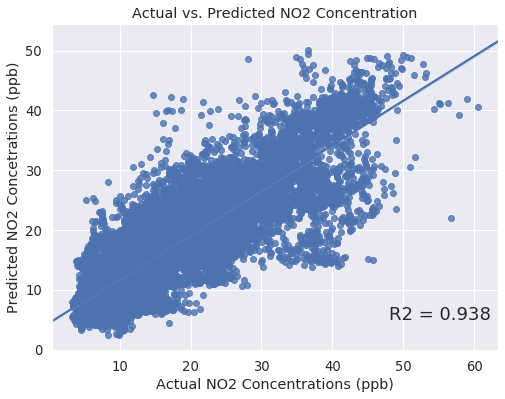

In [110]:
# Creating a plot of NO2 concentration vs predicted concentration using OLS
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)
plt.figure(figsize = (8,6))
ax = sns.regplot(x = NO2_All.NO2_Value, y = NO2_OLS_Lasso_results.fittedvalues, fit_reg=True)
ax.set(xlabel = 'Actual NO2 Concentrations (ppb)', ylabel = 'Predicted NO2 Concetrations (ppb)')
plt.title('Actual vs. Predicted NO2 Concentration')
plt.text(48 , 5 ,"R2 = 0.938", fontsize = 18)


<div class="alert alert-block alert-success"> <b> This model does much better than the model that was developed just based on features that were not highly correlated. Predicted values for high concentration measurements are still pretty poor. The features selected by the Lasso model also have very high VIF scores.</b></div>

##  <b> <font size = 4>  Step Forward Approach with VIF Scores estimation </b> </font>

The approach here is to keep adding features sequentially, each time calculate the R2 value and see that's better than the previous R2. If the R2 is higher, then we calculate the VIF score with addition of each feature. If the VIF score of any of the features increases above threshold of 10, then we drop the newly added feature. 

### <b> <font size = 3>  BC Dataset </b> </font> 

<b> <font size = 3> <span style="color:blue"> First, create a dataframe with y and standardized x values. Then create a dataframe in VIF format i.e. each column header should be Q('column name'), except the target variable.   </b> </font> </span>

In [113]:
y_BC_vif_df = BC_All[['BC_Value']]
X_BC_vif_df = BC_All.drop(columns = ['BC_Value'])
X_BC_scaled_vif_df = pd.DataFrame(StandardScaler().fit_transform(X_BC_vif_df), index = X_BC_vif_df.index, columns = X_BC_vif_df.columns)

<b> <font size = 3> <span style="color:blue">  Dataframe for VIF and Regressions </b> </font> </span>

In [114]:
# Split dataframe into test and train data for R2/vif estimation
X_train_BC_vif, X_test_BC_vif, y_train_BC_vif, y_test_BC_vif = train_test_split(X_BC_vif_df , y_BC_vif_df, test_size  = 0.30, random_state=0)

**Training Data**



In [115]:
X_BC_vif_train, BC_vif_df_train = create_inputs_R2_vif_func_BC(X_train_BC_vif, y_train_BC_vif)

In [116]:
calculate_R2_vif(X_BC_vif_train, 'BC_Value', BC_vif_df_train)

["Q('Radiation')"]


(     VIF Factor        features
 0  46676.348204       Intercept
 1      1.000000  Q('Radiation'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:               BC_Value   R-squared (uncentered):                   0.593
 Model:                            OLS   Adj. R-squared (uncentered):              0.593
 Method:                 Least Squares   F-statistic:                          2.190e+04
 Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        12:16:25   Log-Likelihood:                         -13655.
 No. Observations:               15041   AIC:                                  2.731e+04
 Df Residuals:                   15040   BIC:                                  2.732e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust            

**Test Data**


In [117]:
X_BC_vif_test, BC_vif_df_test = create_inputs_R2_vif_func_BC(X_test_BC_vif, y_test_BC_vif)

In [118]:
calculate_R2_vif(X_BC_vif_test, 'BC_Value', BC_vif_df_test)

["Q('Radiation')"]


(     VIF Factor        features
 0  46894.386704       Intercept
 1      1.000000  Q('Radiation'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:               BC_Value   R-squared (uncentered):                   0.584
 Model:                            OLS   Adj. R-squared (uncentered):              0.584
 Method:                 Least Squares   F-statistic:                              9059.
 Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        12:16:30   Log-Likelihood:                         -6045.7
 No. Observations:                6447   AIC:                                  1.209e+04
 Df Residuals:                    6446   BIC:                                  1.210e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust            

<div class="alert alert-block alert-success"> <b> Based on the step forward VIF approach with R2, 'Radiation' was the only feature that was selected. This indicates Radiation is highly correlated with BC concentration.</b></div>

### <b> <font size = 3>  NO2 Dataset </b> </font> 

<b> <font size = 3> <span style="color:blue"> First, create a dataframe with y and standardized x values. Then create a dataframe in VIF format i.e. each column header should be Q('column name'), except the target variable.   </b> </font> </span>

In [119]:
y_NO2_vif_df = NO2_All[['NO2_Value']]
X_NO2_vif_df = NO2_All.drop(columns = ['NO2_Value'])
X_NO2_scaled_vif_df = pd.DataFrame(StandardScaler().fit_transform(X_NO2_vif_df), index = X_NO2_vif_df.index, columns = X_NO2_vif_df.columns)

<b> <font size = 3> <span style="color:blue">  Dataframe for VIF and Regressions </b> </font> </span>

In [120]:
# Split dataframe into test and train data for R2/vif estimation
X_train_NO2_vif, X_test_NO2_vif, y_train_NO2_vif, y_test_NO2_vif = train_test_split(X_NO2_vif_df , y_NO2_vif_df, test_size  = 0.30, random_state=0)

**Training Data**

In [121]:
X_NO2_vif_train, NO2_vif_df_train = create_inputs_R2_vif_func_NO2(X_train_NO2_vif, y_train_NO2_vif)

In [122]:
calculate_R2_vif(X_NO2_vif_train, 'NO2_Value', NO2_vif_df_train)

["Q('Radiation')"]


(     VIF Factor        features
 0  46676.348204       Intercept
 1      1.000000  Q('Radiation'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.759
 Model:                            OLS   Adj. R-squared (uncentered):              0.759
 Method:                 Least Squares   F-statistic:                          4.748e+04
 Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        12:16:41   Log-Likelihood:                         -55437.
 No. Observations:               15041   AIC:                                  1.109e+05
 Df Residuals:                   15040   BIC:                                  1.109e+05
 Df Model:                           1                                                  
 Covariance Type:            nonrobust            

**Test Data**

In [123]:
X_NO2_vif_test, NO2_vif_df_test = create_inputs_R2_vif_func_NO2(X_test_NO2_vif, y_test_NO2_vif)

In [124]:
calculate_R2_vif(X_NO2_vif_test, 'NO2_Value', NO2_vif_df_test)

["Q('Radiation')"]


(     VIF Factor        features
 0  46894.386704       Intercept
 1      1.000000  Q('Radiation'), <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:              NO2_Value   R-squared (uncentered):                   0.757
 Model:                            OLS   Adj. R-squared (uncentered):              0.757
 Method:                 Least Squares   F-statistic:                          2.004e+04
 Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
 Time:                        12:16:46   Log-Likelihood:                         -23872.
 No. Observations:                6447   AIC:                                  4.775e+04
 Df Residuals:                    6446   BIC:                                  4.775e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust            

<div class="alert alert-block alert-success"> <b> Similar to BC dataset, based on the step forward VIF approach with R2, 'Radiation' was the only feature that was selected. This indicates Radiation is highly correlated with NO2 concentration.</b></div>

##  <b> <font size = 4>  Principal Component Analysis  - Input Dataset</b> </font>

### <b> <font size = 3>  BC Dataset</b> </font> 

In [6]:
y_BC_original = BC_All[['BC_Value']]
X_BC_original = BC_All.drop(columns = 'BC_Value')

In [7]:
# Create the test train split again from the original data, without scaling
X_train_BC_PCA, X_test_BC_PCA, y_train_BC_PCA, y_test_BC_PCA = train_test_split(X_BC_original, y_BC_original, test_size=0.30, random_state=0)

### <b> <font size = 3> NO2 Dataset</b> </font>

In [8]:
y_NO2_original = NO2_All[['NO2_Value']]
X_NO2_original = NO2_All.drop(columns = 'NO2_Value')

In [9]:
# Create the test train split again from the original data, without scaling
X_train_NO2_PCA, X_test_NO2_PCA, y_train_NO2_PCA, y_test_NO2_PCA = train_test_split(X_NO2_original, y_NO2_original, test_size=0.30, random_state=0)

The PCA + DecisionTree Regressor resulted in the selection of 50 components, and the mean cross validation score for the test dataset is 0.78. Predicting the 'y' value based on the model results in an R2 value of 0.88. 99% of the variance in the model is explained with these 50 selected components. 

## <b> <font size = 4>   Random Forest and Cross Validation for Feature Selection  </font></b>

### <b> <font size = 3> BC Dataset</b> </font> 

In [9]:
y_BC_original = BC_All[['BC_Value']]
X_BC_original = BC_All.drop(columns = 'BC_Value')

In [10]:
## Test Train split 
X_BC_original_train, X_BC_original_test, y_BC_original_train, y_BC_original_test = train_test_split(X_BC_original, y_BC_original, test_size = 0.3, random_state = 0)  

**Feature selection using cross validation**

In [83]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 4)
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')
count = 1


feature_names = ['{}'.format(name) for name in X_BC_original.columns]

BC_feature_importance_df = pd.DataFrame({'feature': [], 'importance': [], 'fold': []})

for train, _ in kf.split(X_BC_original, y_BC_original):
    RFRegressor.fit(X_BC_original.iloc[train,:], y_BC_original.iloc[train])
    BC_featureimp_index = np.argsort(RFRegressor.feature_importances_)[::-1]
    BC_labels = [feature_names[-i] for i in BC_featureimp_index]
    
    d = {'feature': BC_labels, 'importance': RFRegressor.feature_importances_[BC_featureimp_index], 'fold': count}
    BC_feature_importance_df = BC_feature_importance_df.append(pd.DataFrame(d))
    count = count + 1
    
#     # plot
#     plt.figure(figsize = (15,15))
#     plt.bar(BC_labels, RFRegressor.feature_importances_[BC_featureimp_index])
#     plt.xticks(BC_labels, rotation='vertical')
#     plt.ylabel('Importance')
#     plt.xlabel('Features')
#     plt.title('Fold {}'.format(count))
#     count = count + 1
# plt.show()


In [84]:
#Reset index and drop the column containin repeating indices
BC_feature_importance_df.reset_index(inplace=True)
BC_feature_importance_df.drop(columns = ['index'], inplace=True)

In [85]:
#Calculate the mean score of all features from cross validation and reset index
BC_feature_importance_df = BC_feature_importance_df.groupby('feature').describe()['importance']
BC_feature_importance_df.reset_index(inplace=True)

In [90]:
BC_feature_importance_df.head(370)

,feature,count,mean,std,min,25%,50%,75%,max,grouping
96,13761511-Transportation-medium_dist,4.0,0.084706,0.133708,0.003013,0.004505,0.026484,0.106685,0.282841,Transportation
273,18541311-Retail-Res-medium_dist,4.0,0.068587,0.109462,0.008055,0.009006,0.016950,0.076531,0.232393,Retail
7,10457711-Foundaries-high_dist,4.0,0.060878,0.117725,0.000088,0.001013,0.002991,0.062857,0.237442,Foundaries
224,18128911-Retail-Res-high_dist,4.0,0.041427,0.066879,0.000523,0.002903,0.012158,0.050683,0.140870,Retail
188,15943911-Retail-Res-low_dist,4.0,0.034597,0.066393,0.001163,0.001360,0.001519,0.034755,0.134186,Retail
218,17252511-Retail-Res-medium_dist,4.0,0.034225,0.028541,0.004596,0.015239,0.031528,0.050515,0.069248,Retail
49,10497711-Retail-Res-medium_dist,4.0,0.027201,0.052109,0.000694,0.001103,0.001374,0.027472,0.105364,Retail
317,382911-Misc-high_dist,4.0,0.019072,0.024612,0.002753,0.006063,0.008935,0.021943,0.055666,Misc
2,10453011-WWTP-medium_dist,4.0,0.018370,0.025027,0.005066,0.005692,0.006257,0.018934,0.055898,WWTP
147,14271411-Retail-Res-medium_dist,4.0,0.018016,0.007776,0.011031,0.011598,0.017306,0.023724,0.026422,Retail


In [87]:
## Assign groupings to dataframe
BC_feature_importance_df['grouping'] = " "
for index, str in enumerate(BC_feature_importance_df['feature']):
    group = re.findall(r'-(.+?)-',str)
    if group:
        BC_feature_importance_df.loc[index, 'grouping'] = group
    else:
        BC_feature_importance_df.loc[index, 'grouping'] =  BC_feature_importance_df.loc[index, 'feature']



In [89]:
BC_feature_importance_df = BC_feature_importance_df.sort_values('mean', ascending = False)

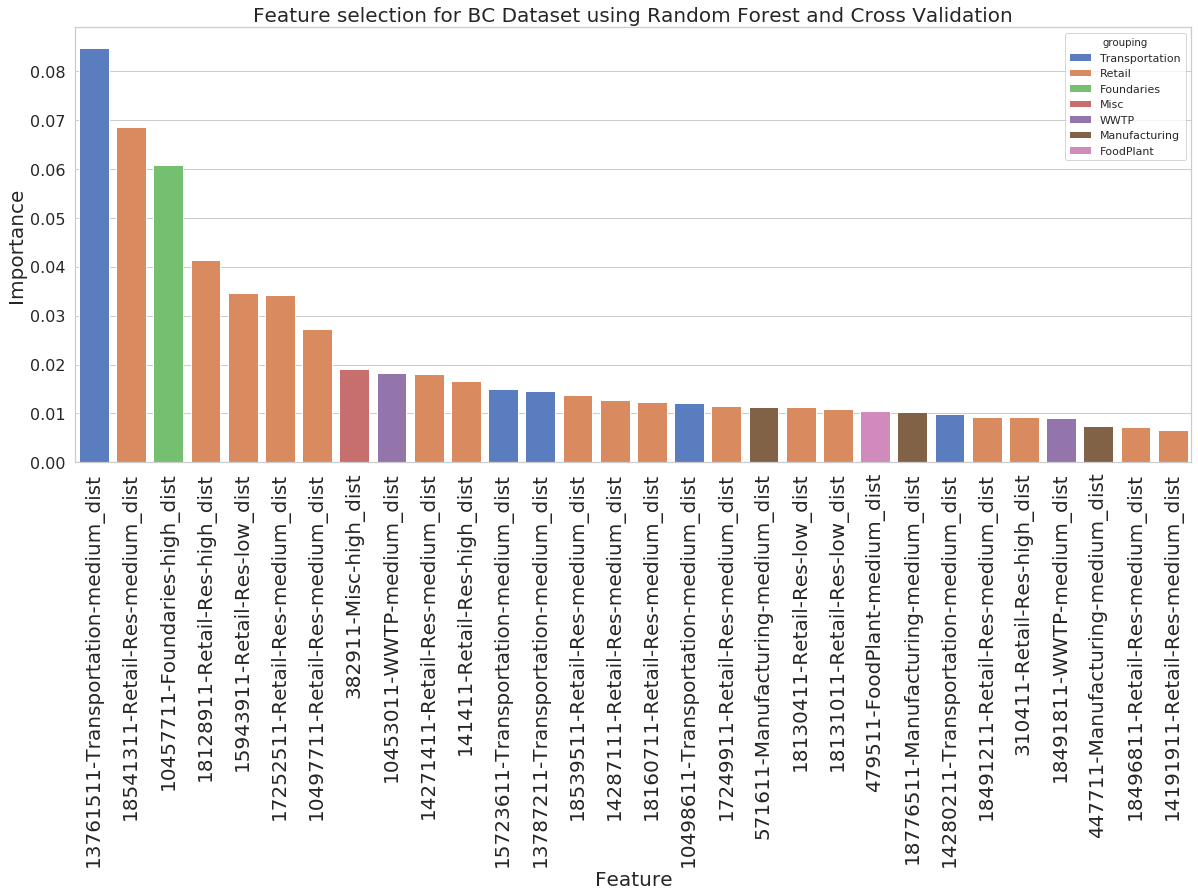

In [91]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'mean', x = 'feature', hue = 'grouping',  data = BC_feature_importance_df[:30],
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection for BC Dataset using Random Forest and Cross Validation", size = 20)
plt.show()
#order=BC_test_feature_importance.sort_values('importance',ascending = False).feature

In [92]:
# Write BC Feature importance to a separate csv file
BC_feature_importance_df.to_csv("Data/BC_feature_importance_All_Facilities.csv")

### <b> <font size = 3>  NO2 Dataset</b> </font> 

In [11]:
y_NO2_original = NO2_All[['NO2_Value']]
X_NO2_original = NO2_All.drop(columns = 'NO2_Value')

In [12]:
## Test Train split 
X_NO2_original_train, X_NO2_original_test, y_NO2_original_train, y_NO2_original_test = train_test_split(X_NO2_original, y_NO2_original, test_size = 0.3, random_state = 0)  

**Feature selection using cross validation**

In [95]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 4)
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')
count = 1


feature_names = ['{}'.format(name) for name in X_NO2_original.columns]

NO2_feature_importance_df = pd.DataFrame({'feature': [], 'importance': [], 'fold': []})

for train, _ in kf.split(X_NO2_original, y_NO2_original):
    RFRegressor.fit(X_NO2_original.iloc[train,:], y_NO2_original.iloc[train])
    NO2_featureimp_index = np.argsort(RFRegressor.feature_importances_)[::-1]
    NO2_labels = [feature_names[-i] for i in NO2_featureimp_index]
    
    d = {'feature': NO2_labels, 'importance': RFRegressor.feature_importances_[NO2_featureimp_index], 'fold': count}
    NO2_feature_importance_df = NO2_feature_importance_df.append(pd.DataFrame(d))
    count = count + 1


In [96]:
#Reset index and drop the column containin repeating indices
NO2_feature_importance_df.reset_index(inplace=True)
NO2_feature_importance_df.drop(columns = ['index'], inplace=True)

In [97]:
#Calculate the mean score of all features from cross validation and reset index
NO2_feature_importance_df = NO2_feature_importance_df.groupby('feature').describe()['importance']
NO2_feature_importance_df.reset_index(inplace=True)

In [98]:
## Assign groupings to dataframe
NO2_feature_importance_df['grouping'] = " "
for index, str in enumerate(NO2_feature_importance_df['feature']):
    group = re.findall(r'-(.+?)-',str)
    if group:
        NO2_feature_importance_df.loc[index, 'grouping'] = group
    else:
        NO2_feature_importance_df.loc[index, 'grouping'] =  NO2_feature_importance_df.loc[index, 'feature']



In [99]:
NO2_feature_importance_df.head(300)

,feature,count,mean,std,min,25%,50%,75%,max,grouping
0,10452911-Retail-Res-high_dist,4.0,0.000984,0.000339,0.000624,0.000738,0.000983,0.001228,0.001345,Retail
1,10453011-WWTP-medium_dist,4.0,0.007301,0.005878,0.002510,0.002798,0.005856,0.010359,0.014982,WWTP
2,10457011-Manufacturing-medium_dist,4.0,0.009112,0.008034,0.002199,0.004799,0.006811,0.011125,0.020628,Manufacturing
3,10457511-Manufacturing-high_dist,4.0,0.000613,0.000532,0.000250,0.000277,0.000406,0.000741,0.001389,Manufacturing
4,10460411-Retail-Res-medium_dist,4.0,0.005043,0.006484,0.000070,0.000937,0.002876,0.006982,0.014347,Retail
5,10460511-Retail-Res-high_dist,4.0,0.021758,0.042641,0.000220,0.000340,0.000546,0.021963,0.085718,Retail
6,10461011-Retail-Res-low_dist,4.0,0.000981,0.001264,0.000264,0.000294,0.000395,0.001082,0.002872,Retail
7,10461711-Retail-Res-medium_dist,4.0,0.053759,0.106811,0.000103,0.000291,0.000479,0.053948,0.213976,Retail
8,10461911-Waste-low_dist,4.0,0.000216,0.000077,0.000123,0.000191,0.000214,0.000239,0.000311,Waste
9,10462111-Retail-Res-low_dist,4.0,0.000237,0.000061,0.000165,0.000212,0.000235,0.000260,0.000314,Retail


In [100]:
NO2_feature_importance_df = NO2_feature_importance_df.sort_values('mean', ascending = False)

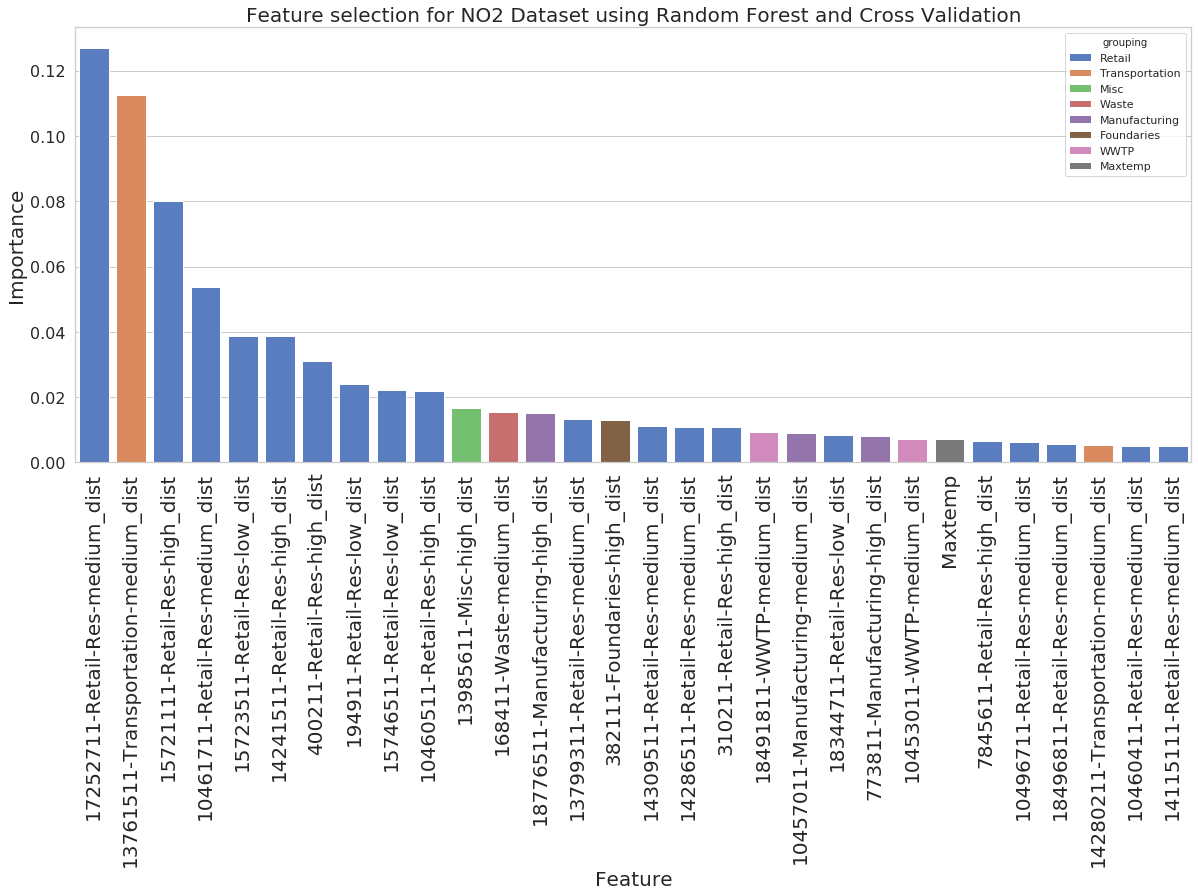

In [101]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'mean', x = 'feature', hue = 'grouping',  data = NO2_feature_importance_df[:30],
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection for NO2 Dataset using Random Forest and Cross Validation", size = 20)
plt.show()

In [102]:
# Write NO2 Feature importance to a separate csv file
NO2_feature_importance_df.to_csv("Data/NO2_feature_importance_All_Facilities.csv")

#  <font size = 5> <b> Machine Learning </font> </b> 

## <b> <font size = 4>  Apply PCA And Test Performance of Several Models </b> </font>

The idea here is to test model performances for different models with PCA and without PCA to see if there is any benefit of performing a PCA. 

<b> <font size = 3> Function to apply PCA and test performance of several models </b> </font> 

In [19]:
def diff_model_test(X,y):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, X,y, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
    results["RidgeCV"] = test_model(clf)

    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    
    clf = RandomForestRegressor(n_estimators = 200)
    results["RandomForest"]=test_model(clf)
    
    #clf = linear_model.BayesianRidge()
    #results["Bayesian Ridge"]=test_model(clf)
    
    #clf = linear_model.HuberRegressor()
    #results["Hubber"]=test_model(clf)
    
    clf = XGBRegressor(n_estimators = 50)
    results['XG Boost'] = test_model(clf)
    
    


    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    #results=results.sort(columns=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results



### <b> <font size = 4> BC Dataset </b> </font> 

In [20]:
## USing PCA to test different models
#Create a Scaler object
scaler_BC = StandardScaler()

# Fit on training set only.
scaler_BC.fit(X_train_BC_PCA)

# Apply transform to both the training set and the test set.
X_train_BC_PCA = scaler_BC.transform(X_train_BC_PCA)
X_test_BC_PCA = scaler_BC.transform(X_test_BC_PCA)

In [21]:
#Instantiate PCA
pca_BC = PCA(0.99) #Set the variance to be 0.99

pca_BC.fit(X_train_BC_PCA)


X_train_BC_PCA_trans = pca_BC.transform(X_train_BC_PCA)
X_test_BC_PCA_trans = pca_BC.transform(X_test_BC_PCA)

**Model scores with PCA**

Model score on training set with PCA: 
 


,R Square Score
Linear,0.658299
Ridge,0.586892
RidgeCV,0.645884
Bagging,0.800443
RandomForest,0.813935
XG Boost,0.681130


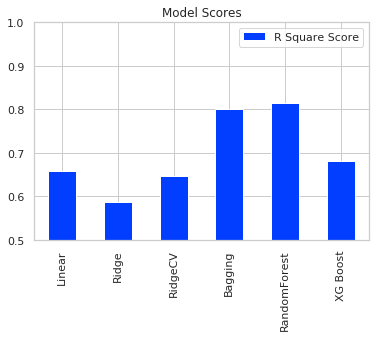

In [22]:
## Call the function on BC dataset
print("Model score on training set with PCA: \n ")
diff_model_test(X_train_BC_PCA, y_train_BC_PCA)

Model score on test set with PCA: 



,R Square Score
Linear,0.645761
Ridge,0.561087
RidgeCV,0.635105
Bagging,0.737963
RandomForest,0.762675
XG Boost,0.669166


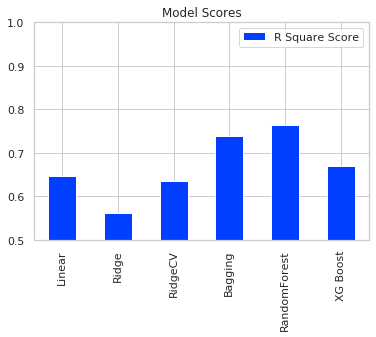

In [23]:
print("Model score on test set with PCA: \n")
diff_model_test(X_test_BC_PCA, y_test_BC_PCA)

**Model scores without PCA**

Model score on test set without PCA:


,R Square Score
Linear,0.605984
Ridge,0.596270
RidgeCV,0.598741
Bagging,0.715232
RandomForest,0.731579
XG Boost,0.643827


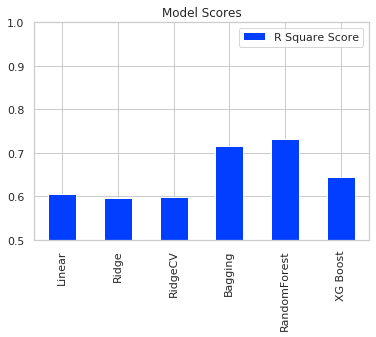

In [62]:
## BC dataset without PCA - use scaled and normalized dataset

## Call the function on BC dataset
print("Model score on test set without PCA:")
diff_model_test(X_test_BC, y_test_BC)

 ### <b> <font size = 4> NO2 Dataset </b> </font> 

In [63]:
## USing PCA to test different models
#Create a Scaler object
scaler_NO2 = StandardScaler()

# Fit on training set only.
scaler_NO2.fit(X_train_NO2_PCA)

# Apply transform to both the training set and the test set.
X_train_NO2_PCA = scaler_NO2.transform(X_train_NO2_PCA)
X_test_NO2_PCA = scaler_NO2.transform(X_test_NO2_PCA)

In [64]:
#Instantiate PCA
pca = PCA(0.99)

pca.fit(X_train_NO2_PCA)


X_train_NO2_PCA_trans = pca.transform(X_train_NO2_PCA)
X_test_NO2_PCA_trans = pca.transform(X_test_NO2_PCA)

**Model scores with PCA**

Model score on training set with PCA: 
 


,R Square Score
Linear,0.760253
Ridge,0.682373
RidgeCV,0.742407
Bagging,0.911945
RandomForest,0.919548
XG Boost,0.790013


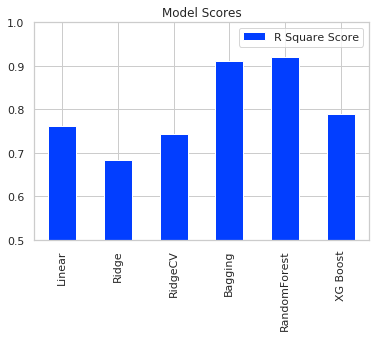

In [65]:
## Call the function on NO2 dataset
print("Model score on training set with PCA: \n ")
diff_model_test(X_train_NO2_PCA, y_train_NO2_PCA)


Model score on test set with PCA: 



,R Square Score
Linear,0.749091
Ridge,0.660212
RidgeCV,0.736677
Bagging,0.887279
RandomForest,0.899310
XG Boost,0.780927


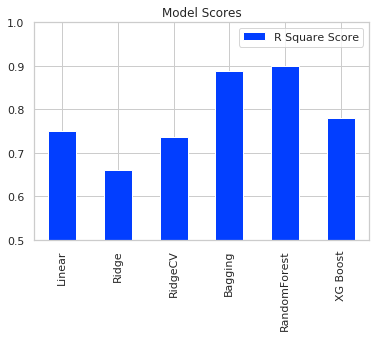

In [66]:
print("Model score on test set with PCA: \n")
diff_model_test(X_test_NO2_PCA, y_test_NO2_PCA)

**Model scores without PCA**


Model score on test set without PCA:


,R Square Score
Linear,0.748091
Ridge,0.724831
RidgeCV,0.739534
Bagging,0.894574
RandomForest,0.905719
XG Boost,0.791325


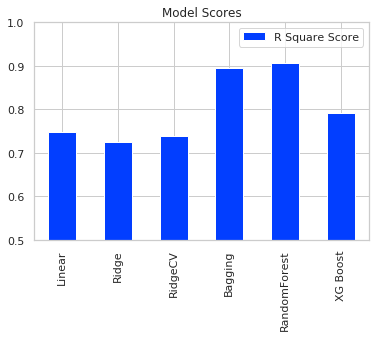

In [67]:
## NO2 dataset without PCA - use scaled and normalized dataset

## Call the function on BC dataset
print("Model score on test set without PCA:")
diff_model_test(X_test_NO2, y_test_NO2)


## <b> <font size = 5> Cross-validation and Gridsearch for Model Selection and Prediction </b> </font> </span>



In [10]:
def cv_gridsearch_models(model_type, X, y, pol ,pca_apply= False):
    """model_type: string. Inputs = ridge, randomforest, xgboost
    X = dataframe with all features (normalized and scaled)
    y = dataframe of target variable
    pca_apply = set apply_pca = True"""
    
    #Split X and y into 70/30 train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

    #Scale the test and training X - data
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_test = feature_scaler.transform(X_test)
    
    
    ## Define grid parameters for different types of model and perform a gridsearch CV over each
    ## First model is a simple RandomforestRegressor. Grid parameters are number of estimators, max_features, and max_depth
    ## Second model is a Ridge Regression model. Grid parameters include Alpha and fit_intercept
    ## Third model is a linear regression model with grid parameters like 
    ## Fourth model is XGBoost, with grid parameters like max_depth, learning rate and number of estimators
    
    if model_type == 'RF':
        rf_regressor = RandomForestRegressor(random_state=0, n_jobs = -1, max_features = 'sqrt', n_estimators = 50)
        grid_param = {
            'n_estimators': [300, 400, 500, 600, 800],
            'max_depth': [5,10, 15, 50]
                      }
        model = GridSearchCV(estimator=rf_regressor,
                     param_grid=grid_param,
 #                    scoring='neg_mean_absolute_error',
                     cv=5,
                     n_jobs=-1)
        
    elif model_type == 'Ridge':
        ridge_reg = Ridge(normalize = True)
        grid_param = {
            'alpha': [1,0.1,0.01,0.001,0,10],
            'fit_intercept': [True, False], 
            }
        model = GridSearchCV(estimator = ridge_reg,
                            param_grid = grid_param,
                            scoring = 'r2',
                            cv = 5)
        
    elif model_type == "ElasticNet":
        elastic_net = ElasticNet(normalize = True, random_state = 0)
        grid_param = {'l1_ratio': [.1, .5, .7, .9, .95, .99, 1],
                     'alpha': [1,0.1,0.01,0, 10]}
        model = GridSearchCV(estimator = elastic_net,
                            param_grid = grid_param,
                            scoring = 'r2',
                            cv = 5)
        
    elif model_type == "Linear":
        linear_reg = LinearRegression(n_jobs = -1)
        grid_param = {'fit_intercept': [True, False]}
        model = GridSearchCV(estimator =linear_reg, param_grid = grid_param,
                            cv = 5)
        
        
    elif model_type == 'XGB':
        XGB_reg = XGBRegressor(objective = 'reg:linear', random_state = 0, n_estimators = 50)
        grid_param = {
            'max_depth' : [2,4,6,10],
            'n_estimators': [40,60,100],
            'learning_rate': [0.1, 0.001, 0.05, 0.01]
            }
        model = GridSearchCV(estimator = XGB_reg,
                            param_grid = grid_param,
 #                           scoring = 'neg_mean_squared_error', 
                             cv = 5)
   
    if (model_type == 'Ridge') & (pca_apply == 'True'):
            pca = PCA(n_components = np.argwhere(np.cumsum(pca.explained_variance_ratio_) > 0.999)[0][0])
            X_train_pca = pca.fit_transform(X_train)
            X_test_pca = pca.transform(X_test)
            model.fit(X_train_pca, y_train)
            train_score= model.score(X_train_pca, y_train)
            test_score = model.score(X_test_pca, y_test)
            print("Train R2 = {}, Test_R2 = {}".format(train_score, test_score))
            best_parameters = model.best_params_
            print("Best parameter for {} is {}".format(model_type, best_parameters))
            best_result = model.best_score_
            print("Best R2 achieved for {} is {}".format(model_type, best_result))
            
    else: 
        model.fit(X_train, y_train)
        y_pred = []
        y_pred = model.predict(X_test)
        # model.predict returns nparray of nparray objects
        if (model_type == "Ridge") or (model_type == "Linear"):
            y_pred = [y[0] for y in y_pred]            
        best_parameters = model.best_params_
        print("Best parameter for {} is {}".format(model_type, best_parameters))
        best_result = model.best_score_
        print("Best accuracy achieved for {} is {}".format(model_type, best_result))
        train_score= model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        print("Train R2 = {}, Test_R2 = {}".format(train_score, test_score))
        best_parameters = model.best_params_
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Root Mean Squared Error: {}".format(rmse))
        

        ##Plot a graph of predicted vs actual values
        #sns.set_style("darkgrid")
        #sns.set(font_scale = 1.2)
        plt.figure(figsize = (8,6))
        ax = sns.regplot(x = y_test, y = y_pred, fit_reg=True)
        if pol=='BC':
            ax.set(xlabel = 'Actual BC Concentrations (ug/m3)', ylabel = 'Predicted BC Concetrations (ug/m3)') 
        else:
            ax.set(xlabel = 'Actual NO2 Concentrations (ppb)', ylabel = 'Predicted NO2 Concetrations (ppb)')
   
        plt.title("Predicted vs. Actual concentration for "+model_type+ " Regression for "+pol)
        if pol=='BC':
            plt.text(6 , 0 ,"R2 = {}".format(round(test_score,3)), fontsize = 18)
        else:
            plt.text(45 , 10 ,"R2 = {}".format(round(test_score,3)), fontsize = 18)
        
        
            
            
        
        

### <b> <font size = 4> BC Dataset </b> </font>

Linear Regression:
Best parameter for Linear is {'fit_intercept': True}
Best accuracy achieved for Linear is 0.6718019585167653
Train R2 = 0.692052543817544, Test_R2 = 0.6743052052769285
Root Mean Squared Error: 0.35279554114119327


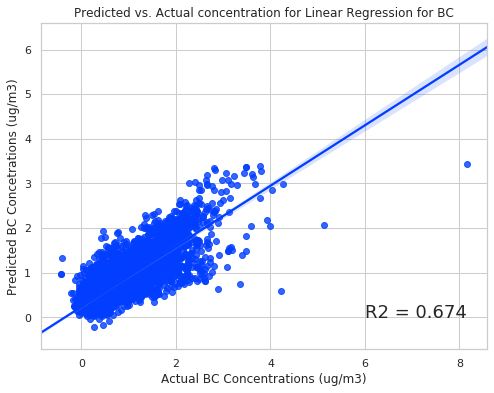

In [11]:
print("Linear Regression:")

cv_gridsearch_models('Linear', X_BC_original, y_BC_original, "BC", False)

Ridge Regression without PCA:
Best parameter for Ridge is {'alpha': 0, 'fit_intercept': True}
Best accuracy achieved for Ridge is 0.6718019585105729
Train R2 = 0.6920525438149336, Test_R2 = 0.6743052052831604
Root Mean Squared Error: 0.3527955411378181


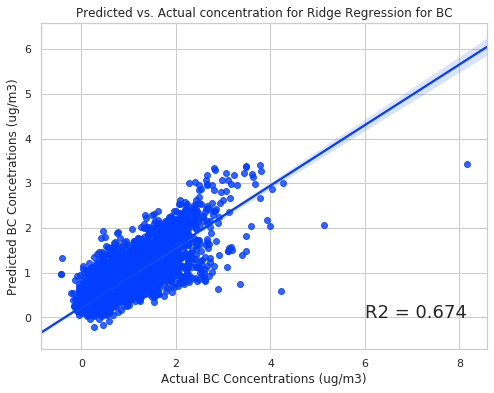

In [12]:
print("Ridge Regression without PCA:")


cv_gridsearch_models('Ridge', X_BC_original, y_BC_original, "BC" ,False)

ElasticNet Regression without PCA:
Best parameter for ElasticNet is {'alpha': 0, 'l1_ratio': 0.1}
Best accuracy achieved for ElasticNet is 0.5499894866345686
Train R2 = 0.5536546918772671, Test_R2 = 0.5414685366536256
Root Mean Squared Error: 0.4186029160727685


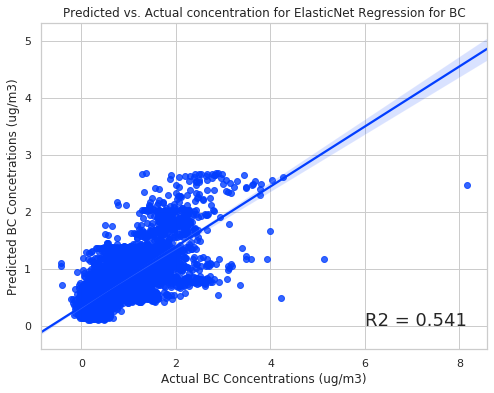

In [13]:
print("ElasticNet Regression without PCA:")


cv_gridsearch_models('ElasticNet', X_BC_original, y_BC_original, "BC" ,False)

Random Forest Regression:
Best parameter for RF is {'max_depth': 15, 'n_estimators': 800}
Best accuracy achieved for RF is 0.8091160723078702
Train R2 = 0.9267348791137142, Test_R2 = 0.7951647827262689
Root Mean Squared Error: 0.2797821429016857


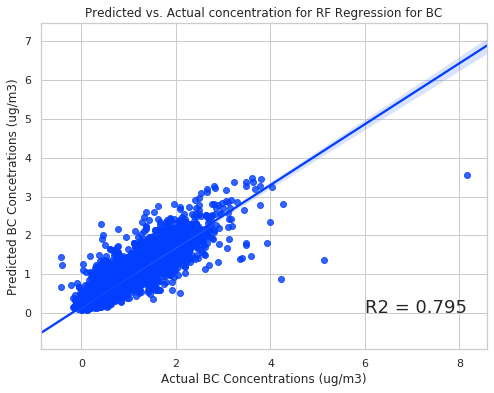

In [14]:
print("Random Forest Regression:")

cv_gridsearch_models('RF', X_BC_original, y_BC_original, "BC", False)

In [19]:
rf_regressor = RandomForestRegressor(random_state=0, n_jobs = -1, max_features = 'sqrt', n_estimators = 800, max_depth = 15)

In [23]:
rf_regressor

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

XGBoost Regression:
Best parameter for XGB is {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best accuracy achieved for XGB is 0.8187487495684528
Train R2 = 0.9309704773993756, Test_R2 = 0.8100745851262938
Root Mean Squared Error: 0.2694072139053117


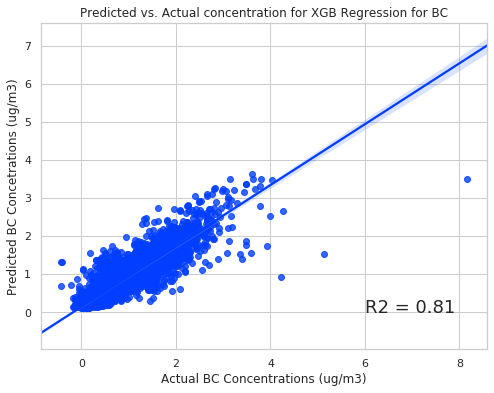

In [15]:
print("XGBoost Regression:")
cv_gridsearch_models('XGB', X_BC_original, y_BC_original, "BC", False)

In [26]:
XGB_reg = XGBRegressor(objective = 'reg:linear', random_state = 0, learning_rate =  0.1, max_depth =  10, n_estimators =  100)


In [27]:
#Save the XGBoost Regression and Random Forest models as pickle file
XBG_BC_pkl = 'xgb_bc.pkl'
# Open the pickle instance, dump best estimators into pickle files
XBG_BC_pkl = open(XBG_BC_pkl, 'wb')
pickle.dump(XGB_reg, XBG_BC_pkl)
# Close the pickle instances
XBG_BC_pkl.close()



In [24]:
#Save the  Random Forest models as pickle file
RF_BC_pkl = 'rf_bc.pkl'
# Open the pickle instance, dump best estimators into pickle files
RF_BC_pkl = open(RF_BC_pkl, 'wb')
pickle.dump(rf_regressor, RF_BC_pkl)
# Close the pickle instances
RF_BC_pkl.close()



### <b> <font size = 4>  NO2 Dataset </b> </font>

Linear Regression:
Best parameter for Linear is {'fit_intercept': True}
Best accuracy achieved for Linear is 0.7600700314708649
Train R2 = 0.7713960863839737, Test_R2 = 0.767365156781551
Root Mean Squared Error: 4.7335801830760635


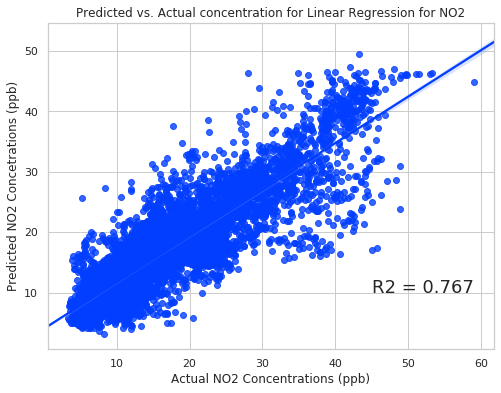

In [28]:
print("Linear Regression:")

cv_gridsearch_models('Linear', X_NO2_original, y_NO2_original, "NO2", False)

Ridge Regression without PCA:
Best parameter for Ridge is {'alpha': 0, 'fit_intercept': True}
Best accuracy achieved for Ridge is 0.75885141239362
Train R2 = 0.7713960863837959, Test_R2 = 0.7673651567865519
Root Mean Squared Error: 4.733580183025185


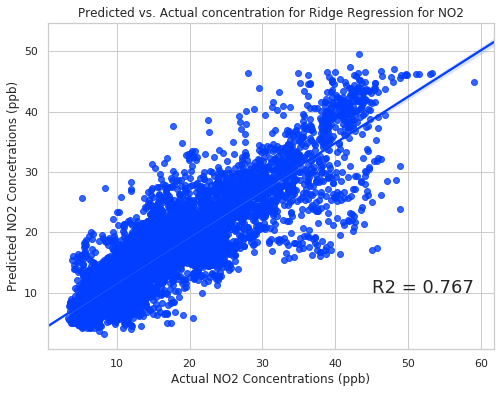

In [29]:
print("Ridge Regression without PCA:")

cv_gridsearch_models('Ridge', X_NO2_original, y_NO2_original,"NO2",False)

ElasticNet Regression without PCA:
Best parameter for ElasticNet is {'alpha': 0, 'l1_ratio': 0.1}
Best accuracy achieved for ElasticNet is 0.6383595262028383
Train R2 = 0.640545654487501, Test_R2 = 0.6353304671073837
Root Mean Squared Error: 5.926551973218568


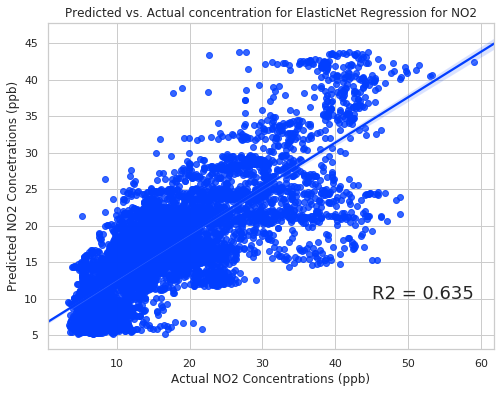

In [30]:
print("ElasticNet Regression without PCA:")


cv_gridsearch_models('ElasticNet', X_NO2_original, y_NO2_original, "NO2" ,False)

Random Forest Regression:
Best parameter for RF is {'max_depth': 50, 'n_estimators': 800}
Best accuracy achieved for RF is 0.9102937750195628
Train R2 = 0.9882865201476224, Test_R2 = 0.916926250380079
Root Mean Squared Error: 2.828682890260696


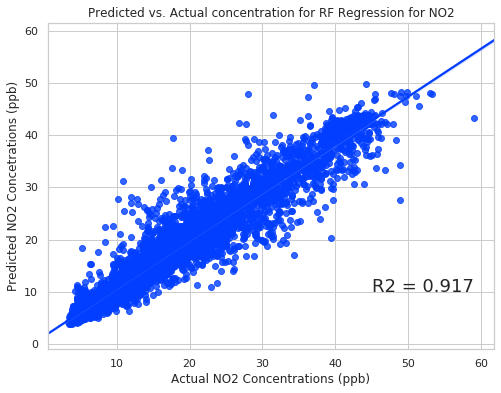

In [103]:
print("Random Forest Regression:")

cv_gridsearch_models('RF', X_NO2_original, y_NO2_original, "NO2")

In [31]:
rf_regressor = RandomForestRegressor(random_state=0, n_jobs = -1, max_features = 'sqrt', n_estimators = 800, max_depth = 50)

XGBoost Regression:
Best parameter for XGB is {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best accuracy achieved for XGB is 0.9203067677218862
Train R2 = 0.9736901148019901, Test_R2 = 0.9248262918404302
Root Mean Squared Error: 2.690824316965867


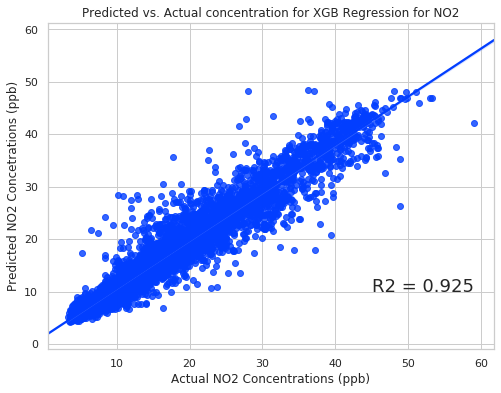

In [105]:
print("XGBoost Regression:")

cv_gridsearch_models('XGB', X_NO2_original, y_NO2_original, "NO2")

In [32]:
XGB_reg = XGBRegressor(objective = 'reg:linear', random_state = 0, learning_rate =  0.1, max_depth =  10, n_estimators =  100)


In [33]:
#Save the XGBoost Regression and Random Forest models as pickle file
XBG_NO2_pkl = 'xgb_no2.pkl'
# Open the pickle instance, dump best estimators into pickle files
XBG_NO2_pkl = open(XBG_NO2_pkl, 'wb')
pickle.dump(XGB_reg, XBG_NO2_pkl)
# Close the pickle instances
XBG_NO2_pkl.close()



In [34]:
#Save the  Random Forest models as pickle file
RF_NO2_pkl = 'rf_no2.pkl'
# Open the pickle instance, dump best estimators into pickle files
RF_NO2_pkl = open(RF_NO2_pkl, 'wb')
pickle.dump(rf_regressor, RF_NO2_pkl)
# Close the pickle instances
RF_NO2_pkl.close()



# <font size = 5> <b> Reference </b> </font>

1. Feature Selection with Pandas: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
    
2. Linear Regression Models: https://towardsdatascience.com/linear-regression-models-4a3d14b8d368
    
3. VIF score estimation: https://etav.github.io/python/vif_factor_python.html
    
4. Wrapper methods: https://stackabuse.com/applying-wrapper-methods-in-python-for-feature-selection/
    
5. Decision Tree Regressor: https://www.dezyre.com/recipes/create-and-optimize-baseline-decision-tree-model-for-regression
    
6. Application of PCA: https://www.dezyre.com/recipes/create-and-optimize-baseline-decision-tree-model-for-regression
    
7. XGBoost: https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/
    
8. Crossvalidation and Gridsearch CV: https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
    